In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud

In [2]:
df_train = pd.read_csv('processed_data/csv/train.csv')
df_train.head()

,text,label
0,﻿Bánh ống Trà Vinh\r\nGian hàng là một cái nồi...,Am thuc
1,﻿Khử mùi tanh ở cá\r\nCá tanh là do chứa một s...,Am thuc
2,"﻿Tré Bình Định\r\nMón ăn này đặc biệt dễ làm, ...",Am thuc
3,"﻿Cua chiên trứng\r\nSau khi chế biến, bạn có t...",Am thuc
4,﻿Chịn xồm - món lạ \r\nChịn xồm là món thịt ch...,Am thuc


In [3]:
df_test = pd.read_csv('processed_data/csv/test.csv')
df_test.head()

,text,label
0,﻿Lẩu gà thuốc bắc\r\nGà nấu lẩu theo cách này ...,Am thuc
1,﻿Cà muối xổi\r\nDù bữa cơm của người Hà Nội bâ...,Am thuc
2,﻿Kembong thai\r\nMón ăn có hương vị Thái Lan n...,Am thuc
3,﻿Khoai tây trộn kiểu Jamaica\r\nMón ăn này thí...,Am thuc
4,"﻿Bò lục sắc\r\nMón ăn này chế biến rất nhanh, ...",Am thuc


In [4]:
df_train.shape, df_test.shape

((14375, 2), (12076, 2))

In [5]:
df_train.info(), df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14375 entries, 0 to 14374
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    14375 non-null  object
 1   label   14375 non-null  object
dtypes: object(2)
memory usage: 224.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12076 entries, 0 to 12075
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    12076 non-null  object
 1   label   12076 non-null  object
dtypes: object(2)
memory usage: 188.8+ KB


(None, None)

In [6]:
df_train['label'].value_counts(), df_test['label'].value_counts()

(Bong da                 1857
 San khau dien anh       1117
 Am nhac                  900
 Giai tri tin hoc         825
 Giao duc                 821
 Lam dep                  776
 San pham tin hoc moi     770
 Cuoc song do day         729
 Du hoc                   682
 Tennis                   588
 Du lich                  582
 Kinh doanh quoc te       571
 Cum ga                   510
 Thoi trang               412
 Chung khoan              382
 Hackers va Virus         355
 Gioi tinh                343
 The gioi tre             331
 Am thuc                  265
 Bat dong san             246
 Loi song                 223
 Gia dinh                 213
 Duong vao WTO            208
 My thuat                 193
 Mua sam                  187
 Hinh su                  155
 Khong gian song          134
 Name: label, dtype: int64, Bong da                 1464
 San khau dien anh       1030
 Am nhac                  813
 Lam dep                  735
 Giai tri tin hoc         707
 Giao duc    

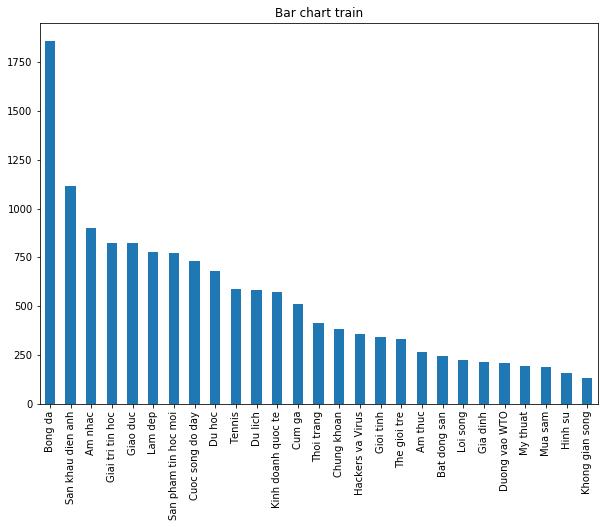

In [7]:
ax, fig = plt.subplots(figsize=(10, 7))
question_class = df_train['label'].value_counts()
question_class.plot(kind= 'bar')
plt.title('Bar chart train')
plt.show()

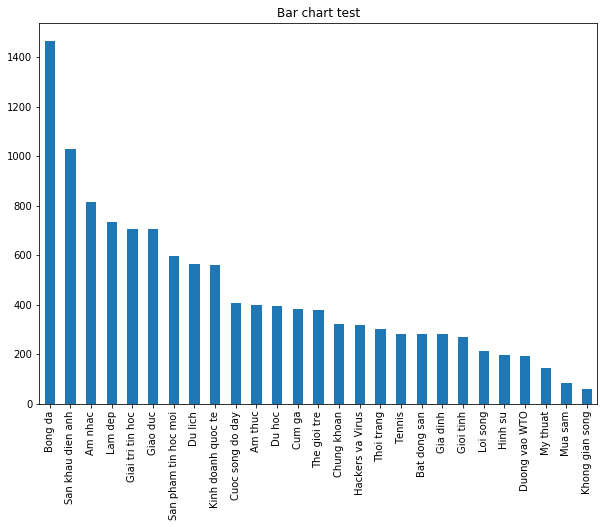

In [8]:
ax, fig = plt.subplots(figsize=(10, 7))
question_class = df_test['label'].value_counts()
question_class.plot(kind= 'bar')
plt.title('Bar chart test')
plt.show()

In [9]:
# Length distribution
df_train['text_length'] = df_train['text'].apply(lambda x: len(x))
df_test['text_length'] = df_test['text'].apply(lambda x: len(x))

In [10]:
df_train['text_length'].mean()

2440.589147826087

In [11]:
df_test['text_length'].mean()

2215.41255382577

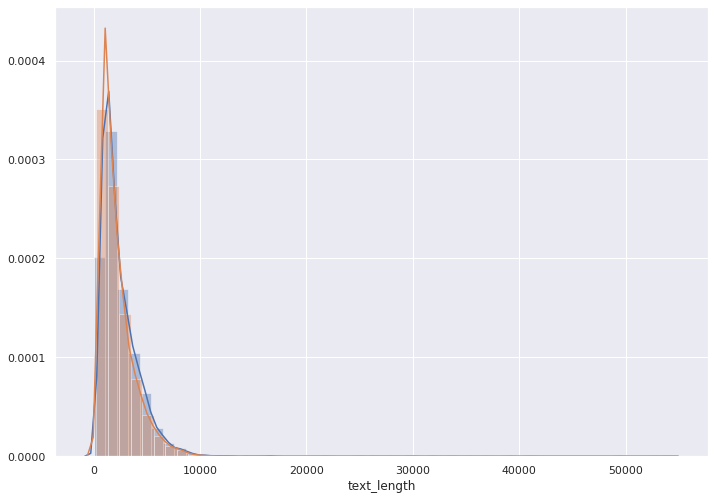

In [12]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df_train['text_length'], hist=True, label='train')
sns.distplot(df_test['text_length'], hist=True, label='test')

In [13]:
# Number of words distribution
from preprocess_text import TextPreprocess
df_train['processed_text'] = df_train['text'].apply(lambda x: ' '.join(TextPreprocess(x).get_words_split()))
df_test['processed_text'] = df_test['text'].apply(lambda x: ' '.join(TextPreprocess(x).get_words_split()))                                               

In [22]:
df_train['processed_text'] = df_train['processed_text'].apply(lambda x: x.replace('_', ' '))
df_test['processed_text'] = df_test['processed_text'].apply(lambda x: x.replace('_', ' '))  

In [23]:
df_train.head()

,text,label,text_length,processed_text,number_words
0,﻿Bánh ống Trà Vinh\r\nGian hàng là một cái nồi...,Am thuc,1201,﻿ bánh ống trà vinh gian hàng là một cái nồi đ...,227
1,﻿Khử mùi tanh ở cá\r\nCá tanh là do chứa một s...,Am thuc,862,﻿ khử mùi tanh ở cá cá tanh là do chứa một số ...,172
2,"﻿Tré Bình Định\r\nMón ăn này đặc biệt dễ làm, ...",Am thuc,682,﻿ tré bình định món ăn này đặc biệt dễ làm có...,122
3,"﻿Cua chiên trứng\r\nSau khi chế biến, bạn có t...",Am thuc,674,﻿ cua chiên trứng sau khi chế biến bạn có thể...,113
4,﻿Chịn xồm - món lạ \r\nChịn xồm là món thịt ch...,Am thuc,1985,﻿ chịn xồm món lạ chịn xồm là món thịt chua c...,391


In [24]:
df_train['number_words'] = df_train['processed_text'].apply(lambda x: len(x.split()))
df_test['number_words'] = df_test['processed_text'].apply(lambda x: len(x.split()))

In [25]:
df_train.head()

,text,label,text_length,processed_text,number_words
0,﻿Bánh ống Trà Vinh\r\nGian hàng là một cái nồi...,Am thuc,1201,﻿ bánh ống trà vinh gian hàng là một cái nồi đ...,266
1,﻿Khử mùi tanh ở cá\r\nCá tanh là do chứa một s...,Am thuc,862,﻿ khử mùi tanh ở cá cá tanh là do chứa một số ...,190
2,"﻿Tré Bình Định\r\nMón ăn này đặc biệt dễ làm, ...",Am thuc,682,﻿ tré bình định món ăn này đặc biệt dễ làm có...,142
3,"﻿Cua chiên trứng\r\nSau khi chế biến, bạn có t...",Am thuc,674,﻿ cua chiên trứng sau khi chế biến bạn có thể...,139
4,﻿Chịn xồm - món lạ \r\nChịn xồm là món thịt ch...,Am thuc,1985,﻿ chịn xồm món lạ chịn xồm là món thịt chua c...,432


In [26]:
df_train['number_words'].mean()

514.523547826087

In [27]:
df_test['number_words'].mean()

467.57287181185825

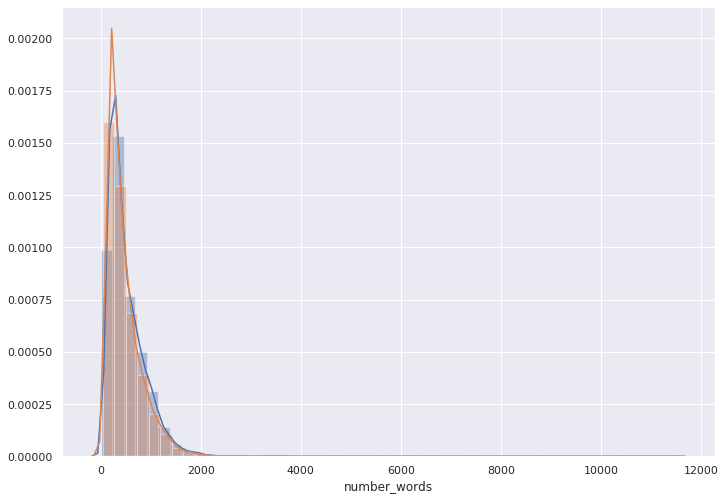

In [28]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df_train['number_words'], hist=True, label='train')
sns.distplot(df_test['number_words'], hist=True, label='test')

In [95]:
from collections import defaultdict
import re
# Count n-gram
def ngram_extractor(text, n_gram):
    text = re.sub(' +', ' ', text)
    tokens = [token for token in text.lower().split(" ")]
    ngrams = [tokens[i:i+n_gram] for i in range(len(tokens) - n_gram + 1)]
    ngrams = [" ".join(ngram) for ngram in ngrams]
    return ngrams

# Function to generate a dataframe with n_gram and top max_row frequencies
def generate_ngrams(df, n_gram, max_row):
    temp_dict = defaultdict(int)
    for text in df['processed_text']:
        for word in ngram_extractor(text, n_gram):
            temp_dict[word] += 1
    temp_df = pd.DataFrame(sorted(temp_dict.items(), key=lambda x: x[1])[::-1]).head(max_row)
    temp_df.columns = ["word", "wordcount"]
    return temp_df

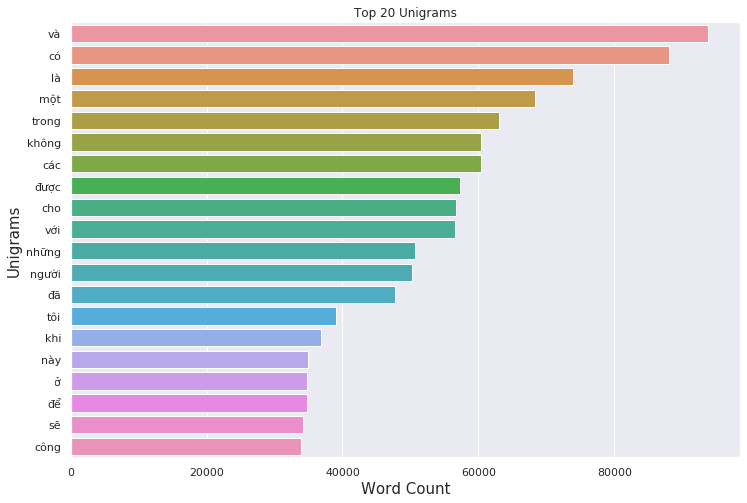

In [96]:
unigram = generate_ngrams(df_train, 1, 21)
#generate barplot for unigram
plt.figure(figsize=(12,8))
sns.barplot(unigram["wordcount"][1:], unigram["word"][1:])
plt.xlabel("Word Count", fontsize=15)
plt.ylabel("Unigrams", fontsize=15)
plt.title("Top 20 Unigrams")
plt.show()

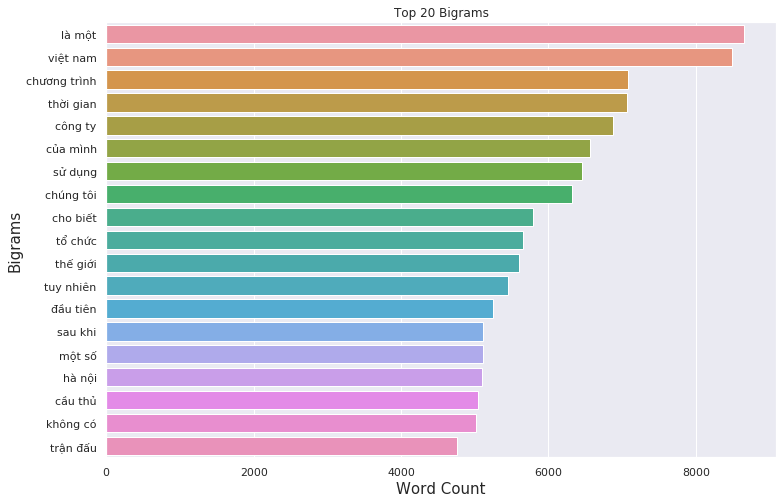

In [97]:
bigram = generate_ngrams(df_train, 2, 20)
#generate barplot for unigram
plt.figure(figsize=(12,8))
sns.barplot(bigram["wordcount"][1:], bigram["word"][1:])
plt.xlabel("Word Count", fontsize=15)
plt.ylabel("Bigrams", fontsize=15)
plt.title("Top 20 Bigrams")
plt.show()

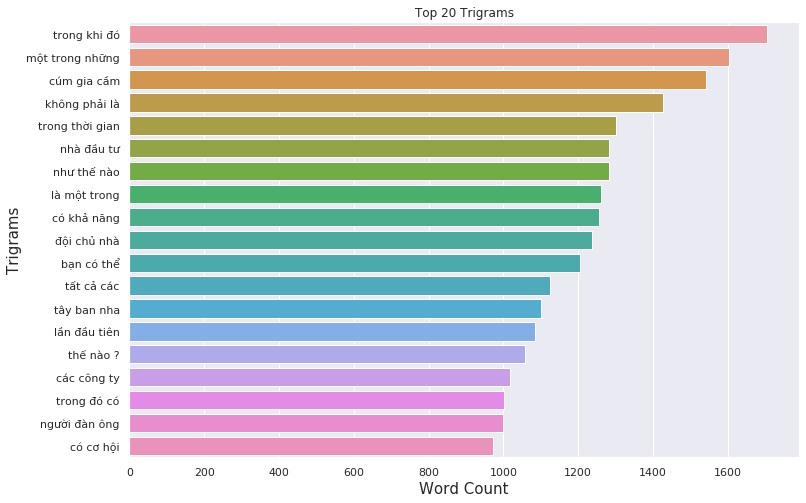

In [98]:
trigram = generate_ngrams(df_train, 3, 20)
#generate barplot for unigram
plt.figure(figsize=(12,8))
sns.barplot(trigram["wordcount"][1:], trigram["word"][1:])
plt.xlabel("Word Count", fontsize=15)
plt.ylabel("Trigrams", fontsize=15)
plt.title("Top 20 Trigrams")
plt.show()

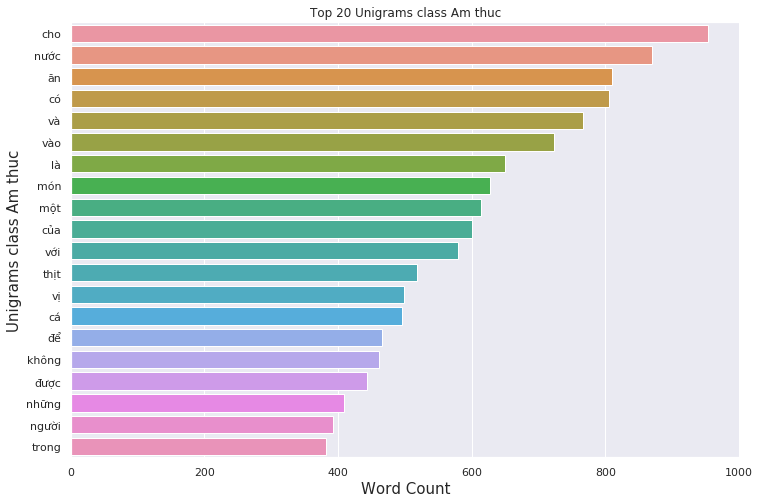

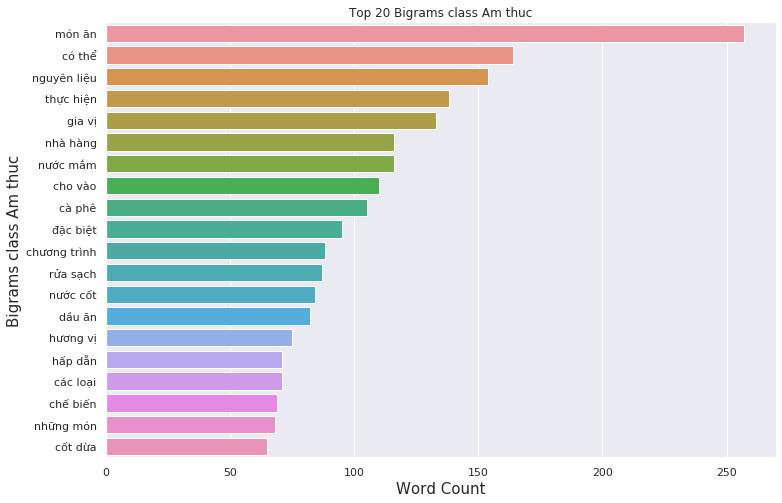

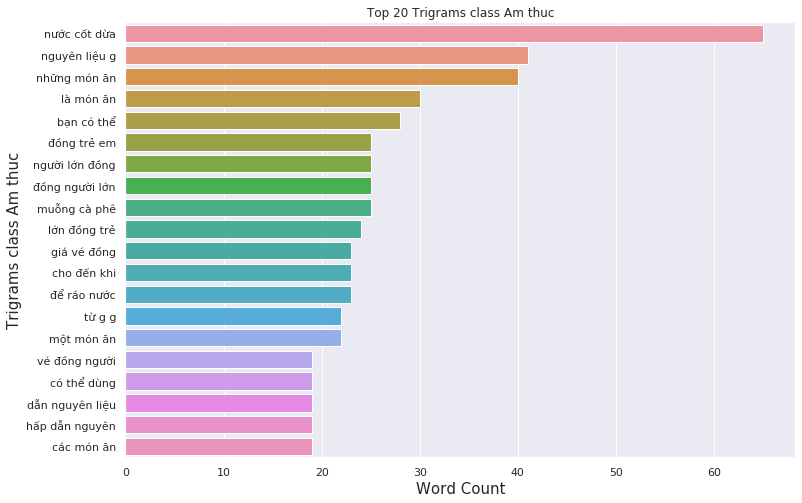

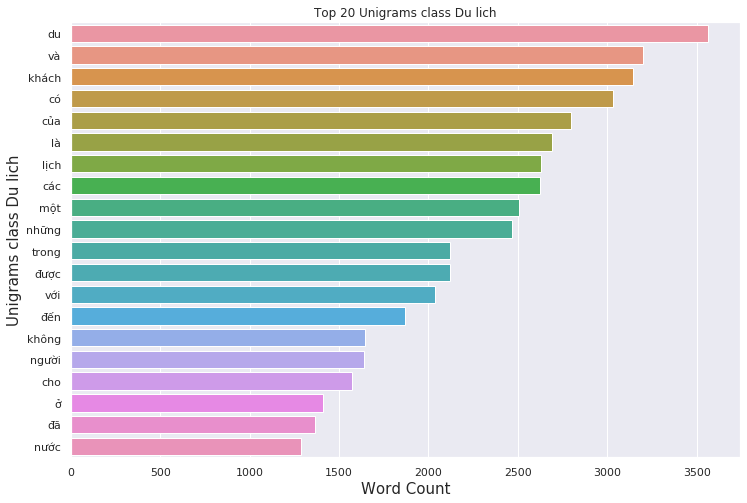

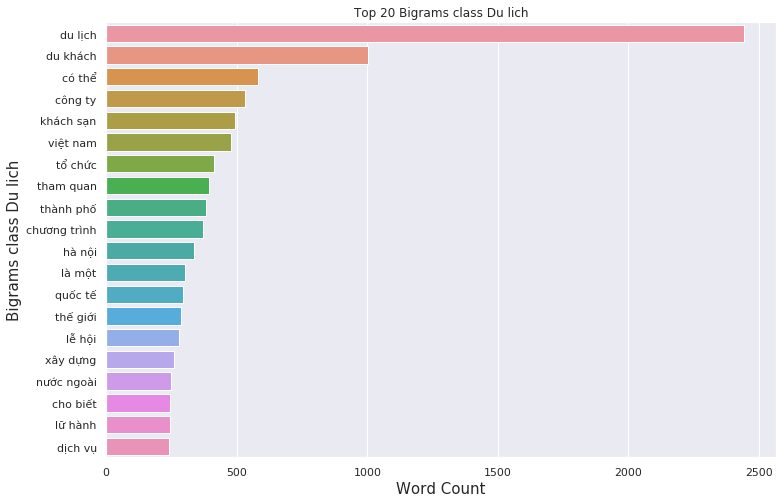

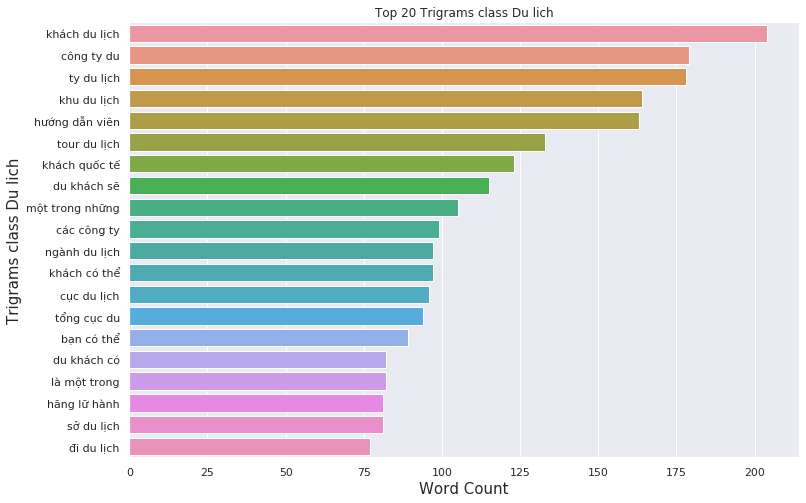

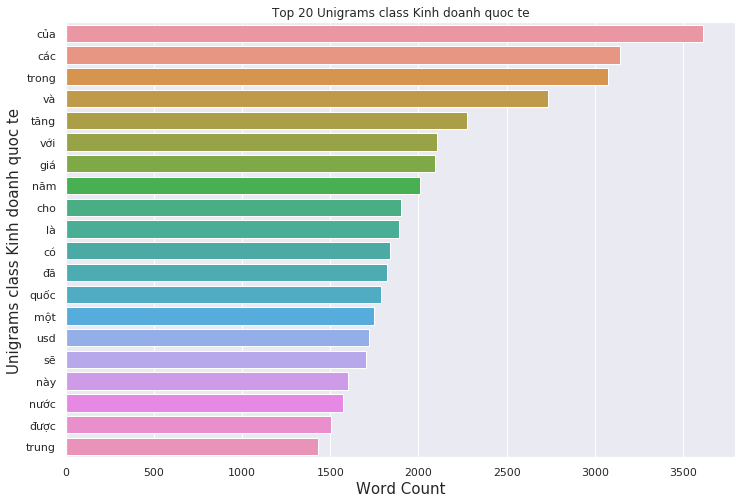

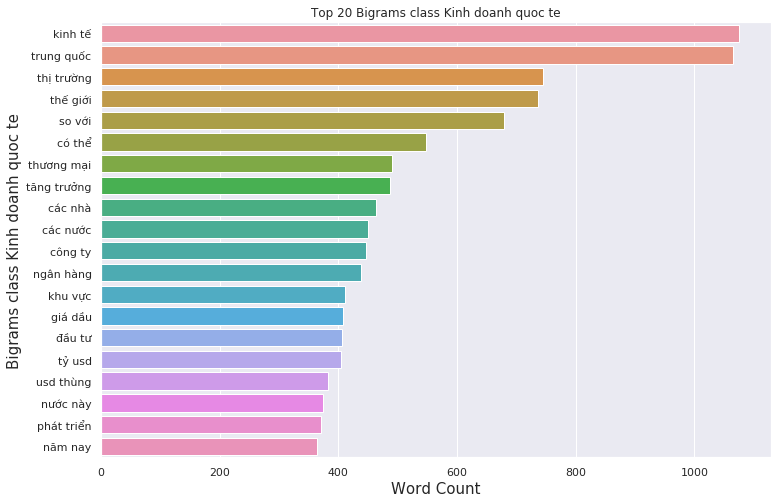

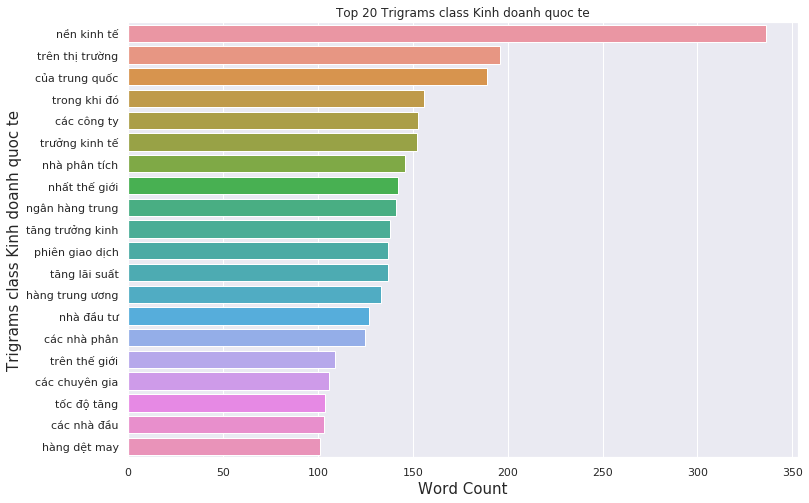

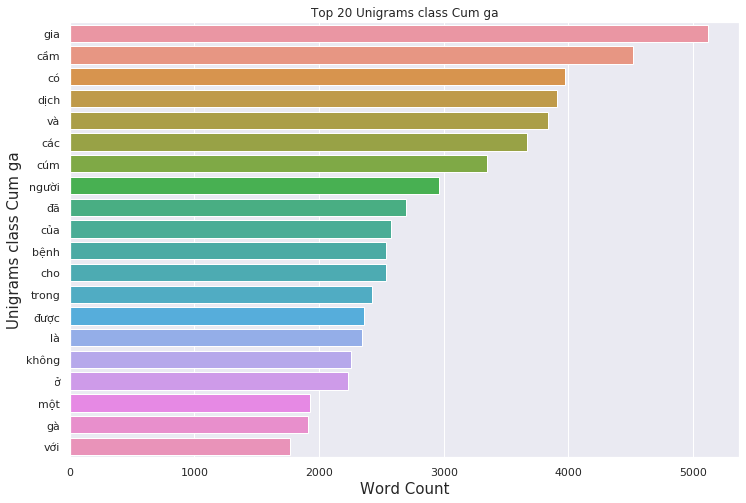

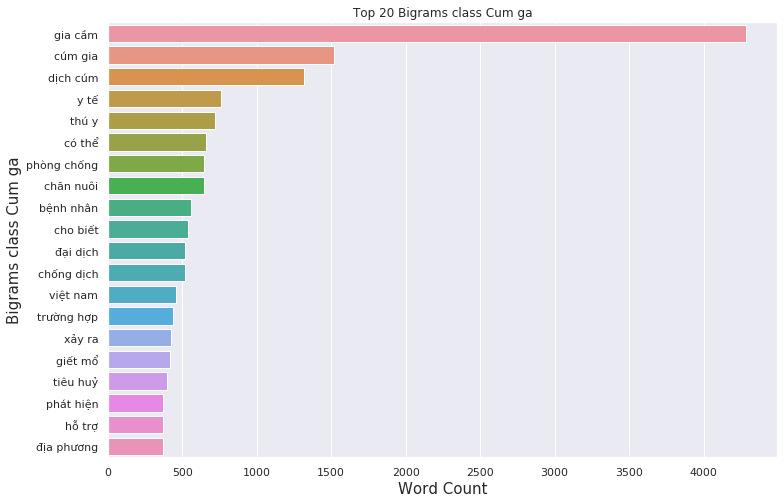

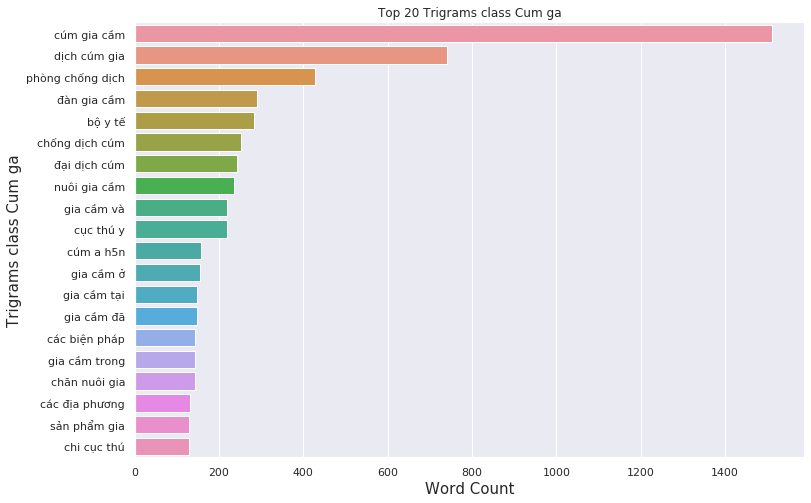

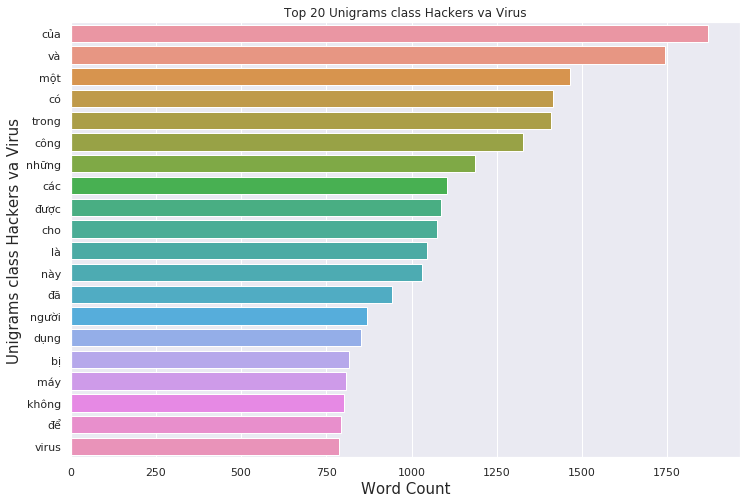

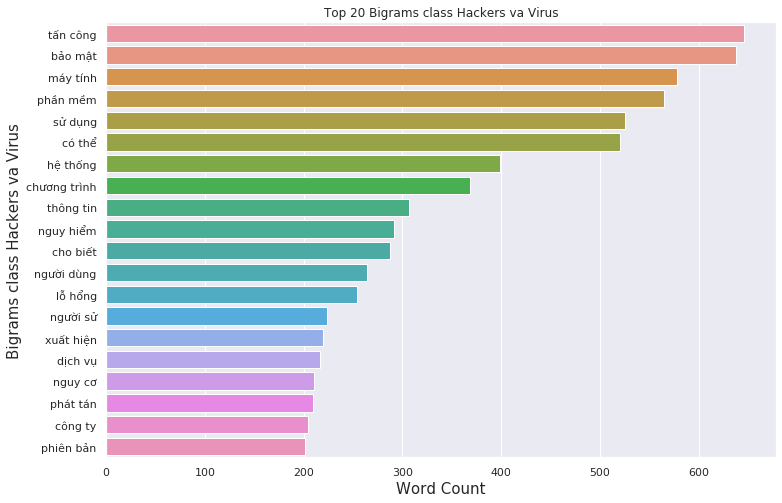

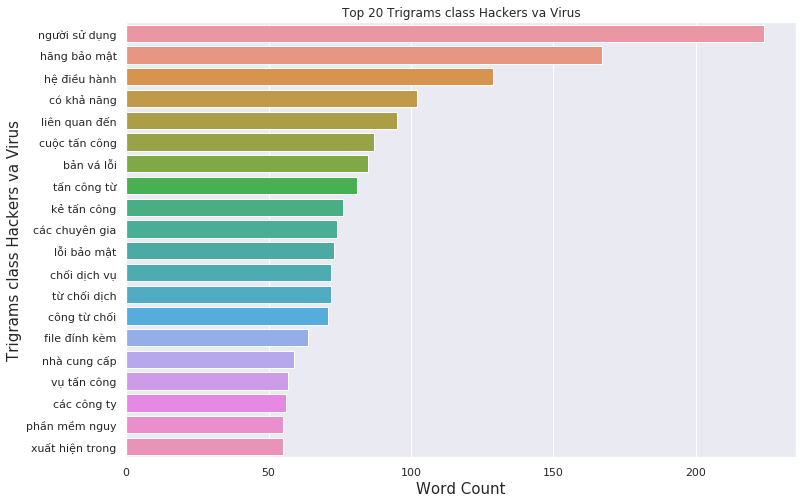

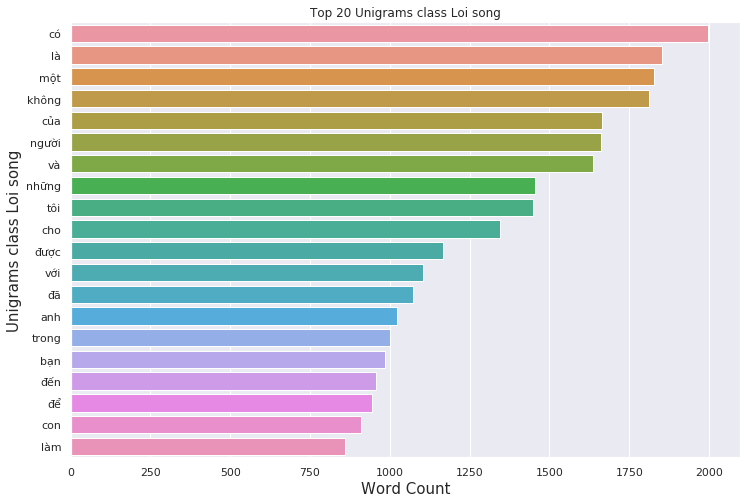

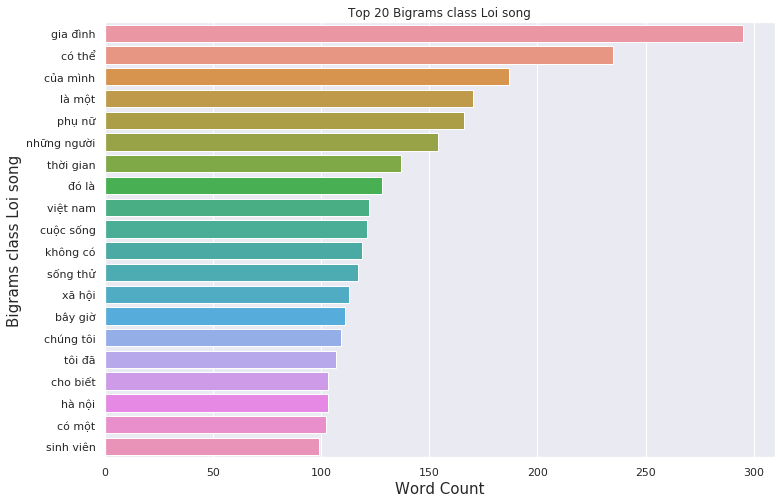

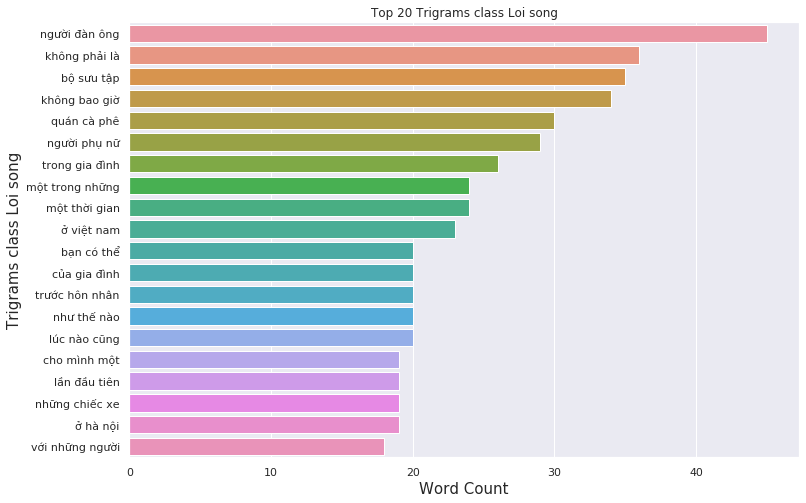

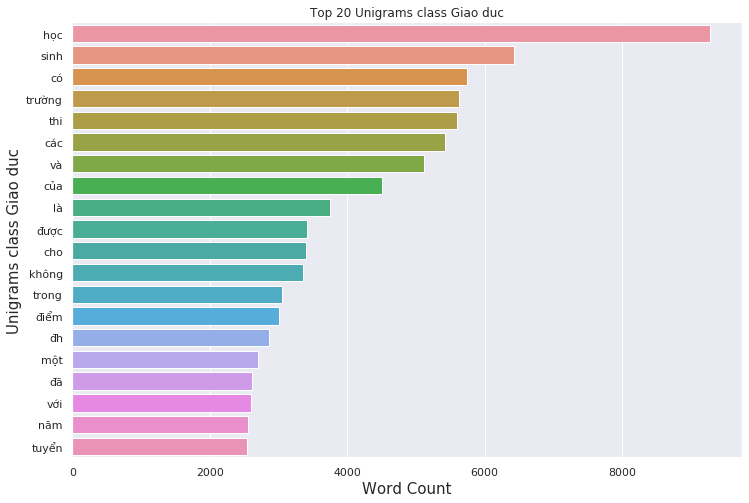

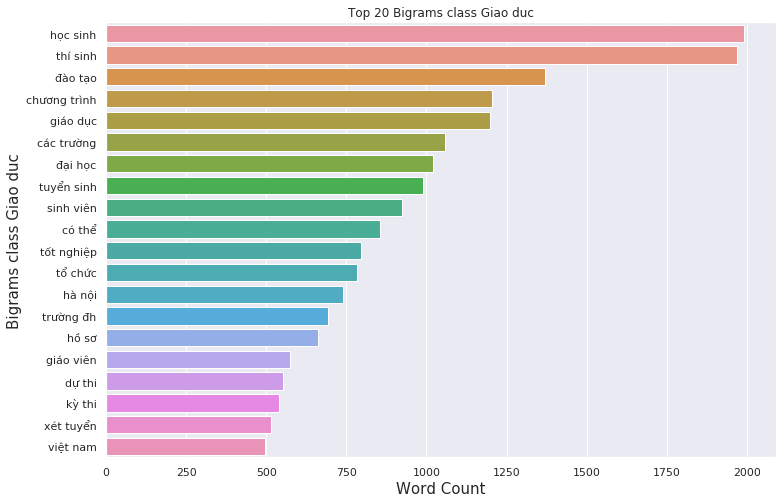

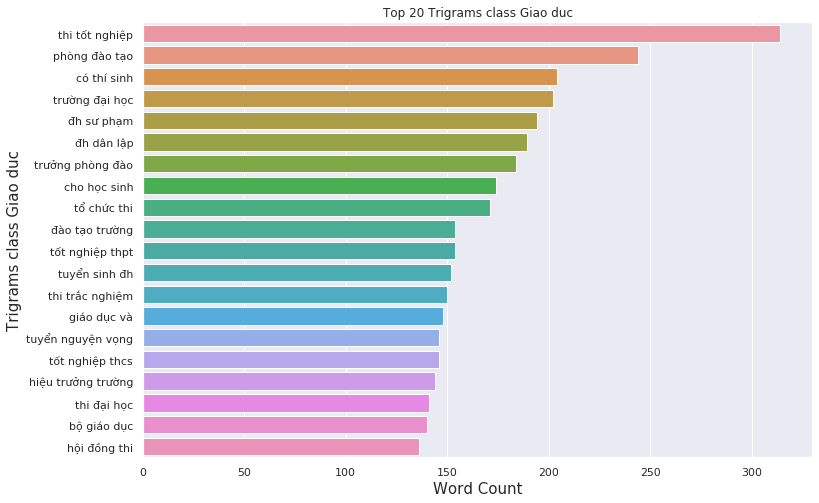

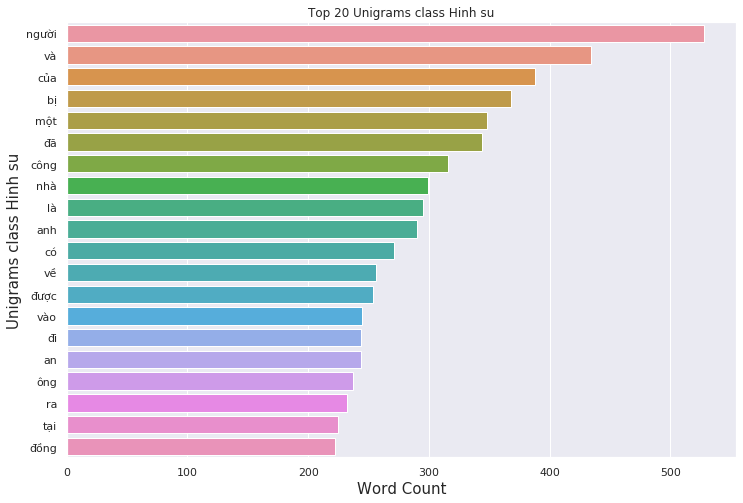

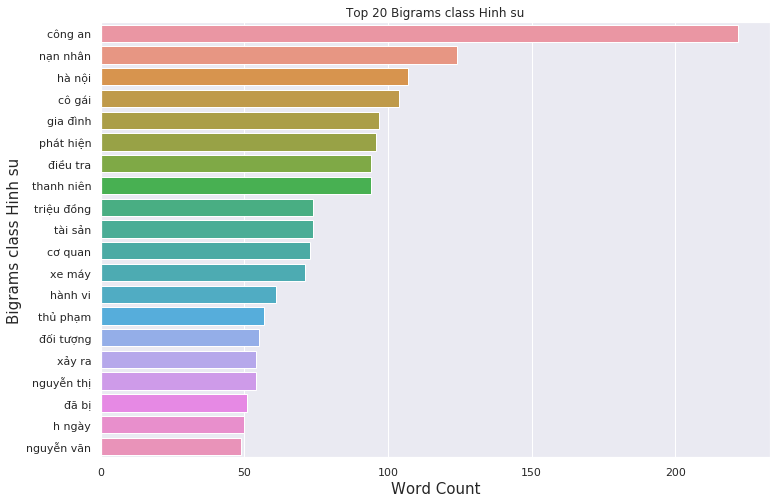

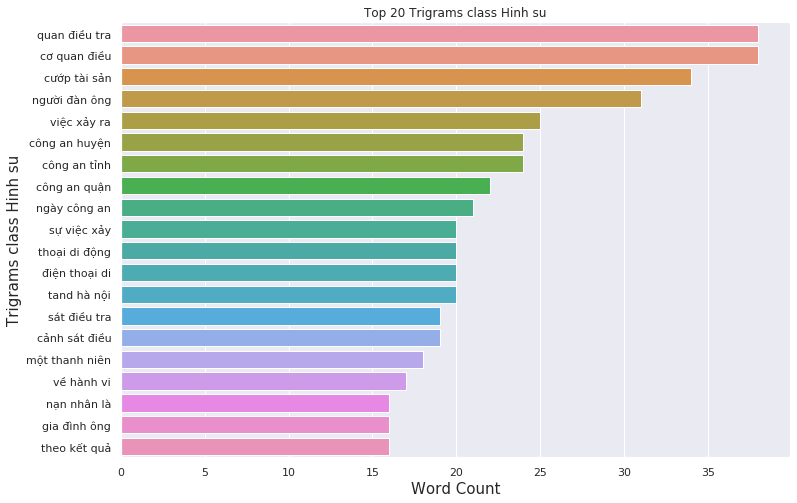

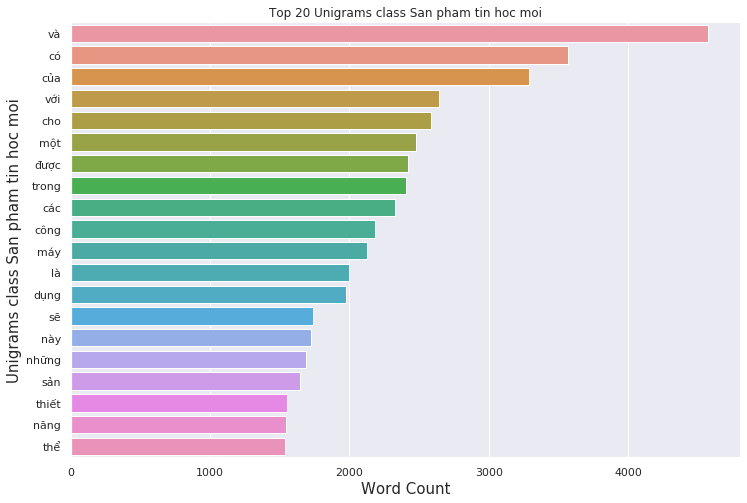

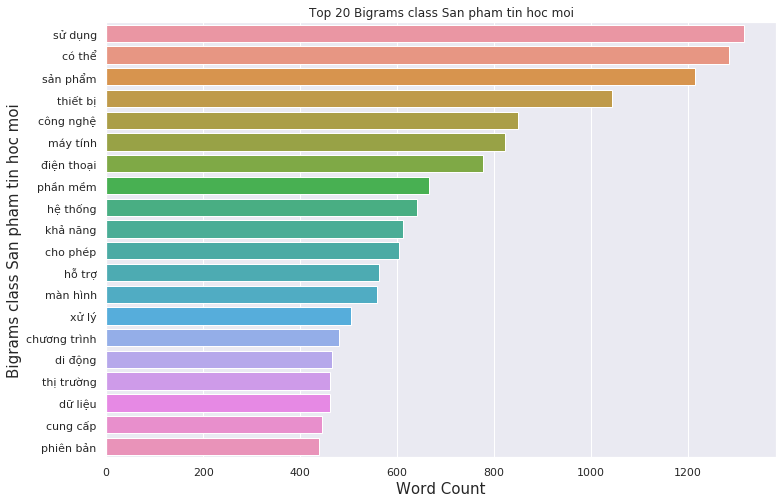

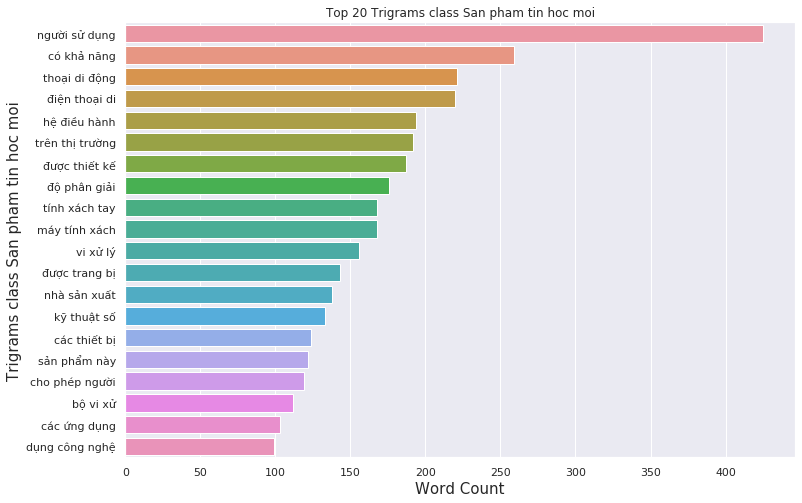

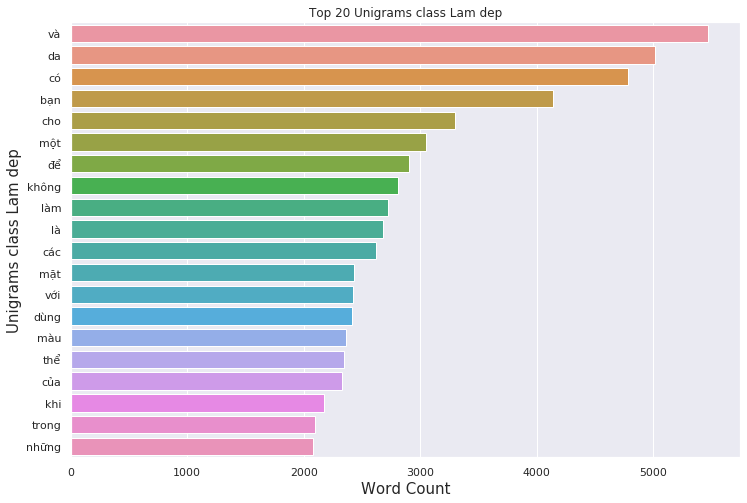

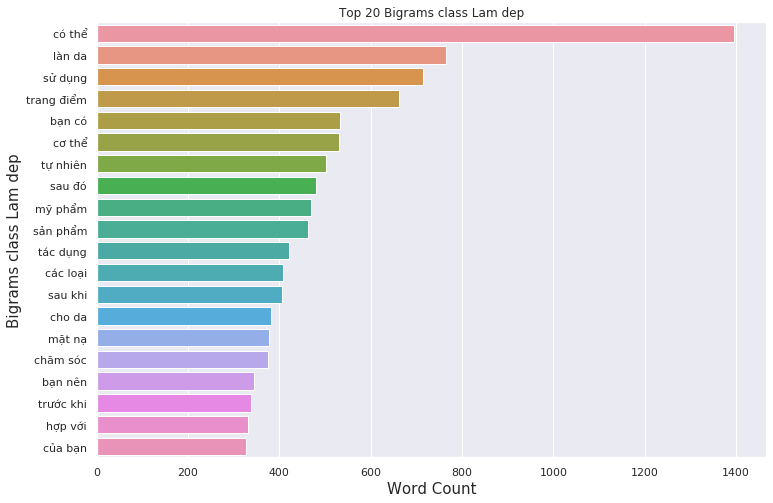

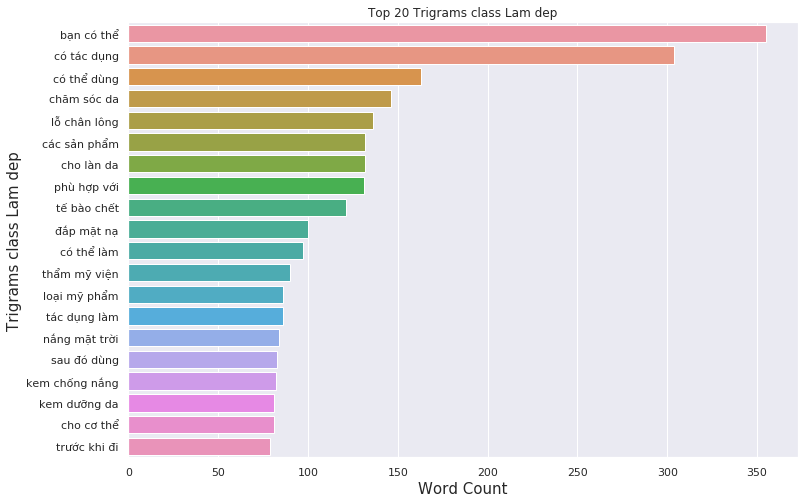

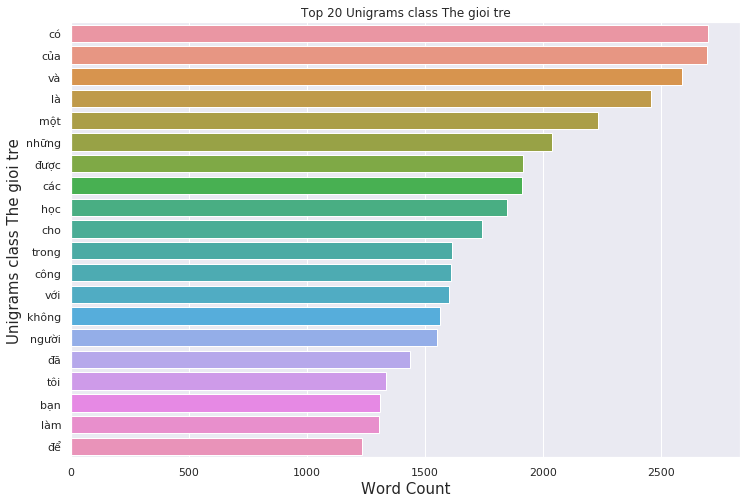

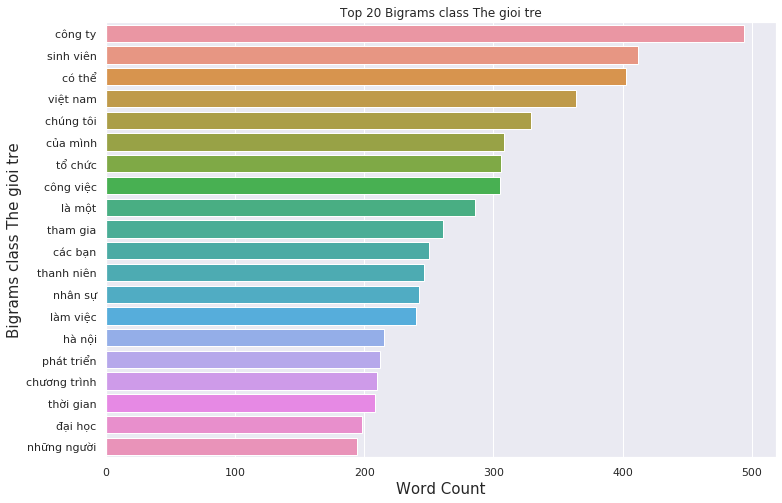

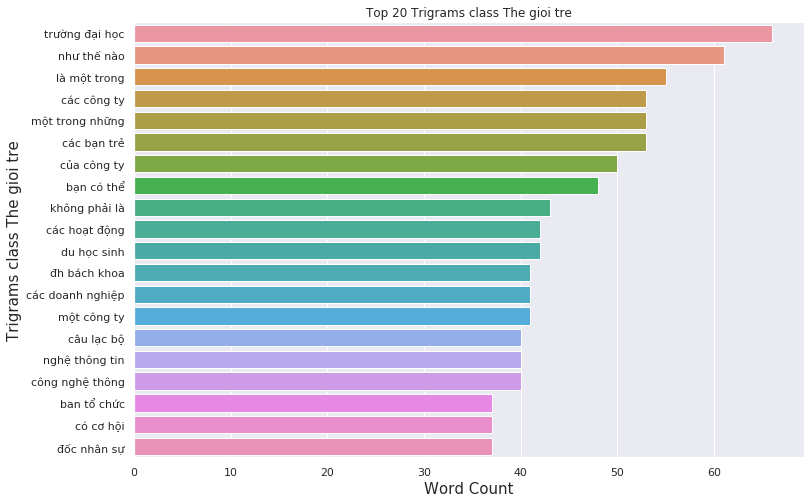

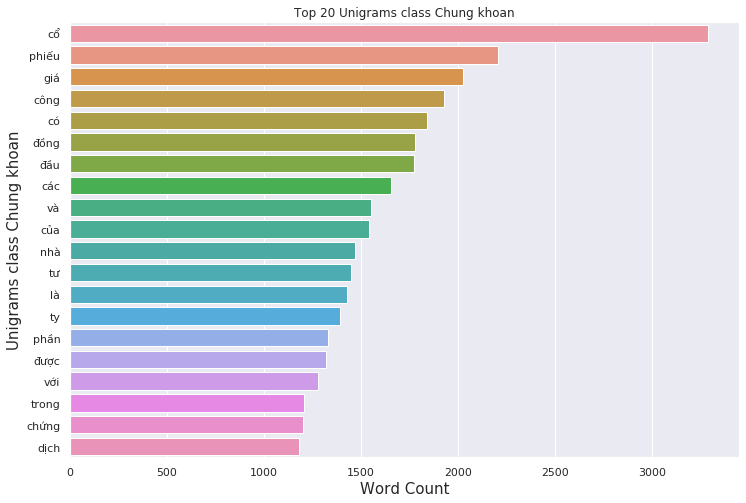

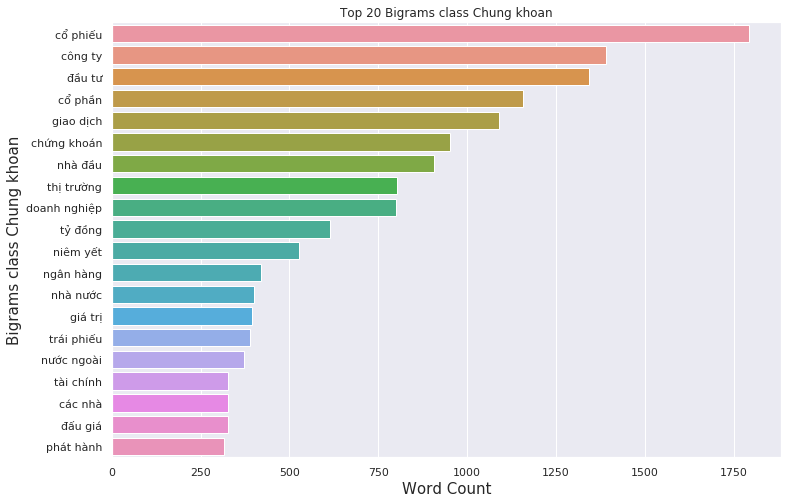

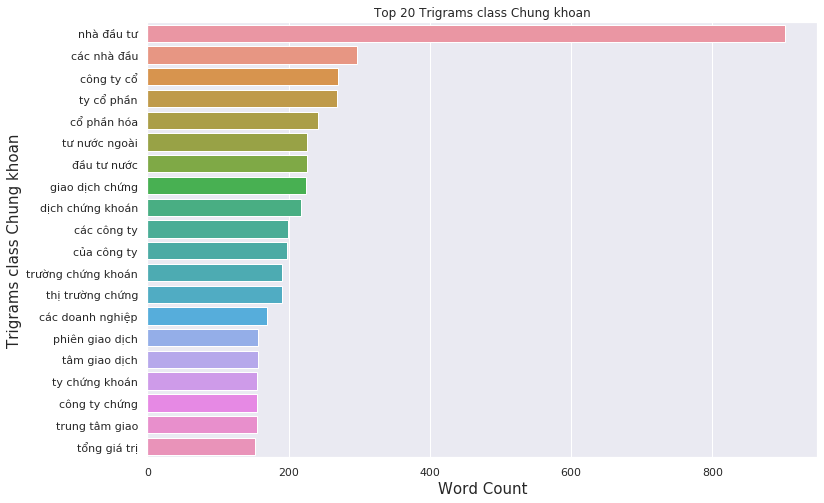

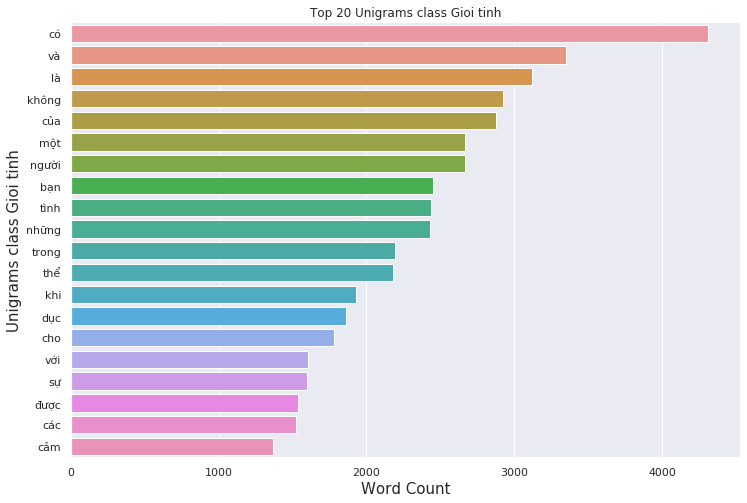

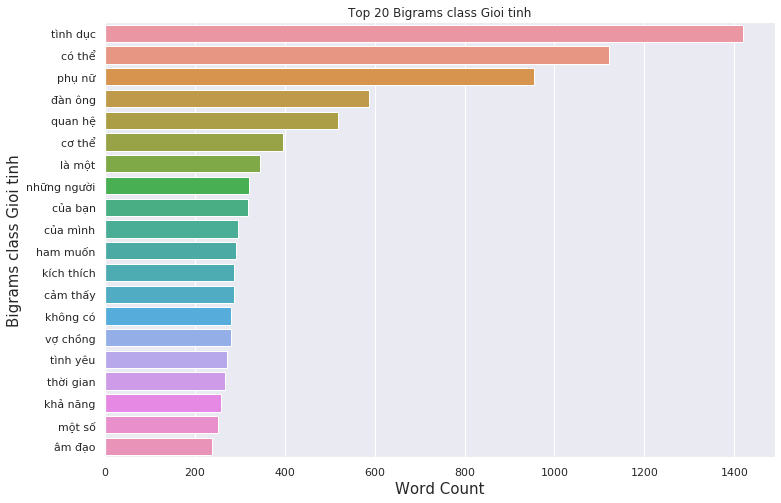

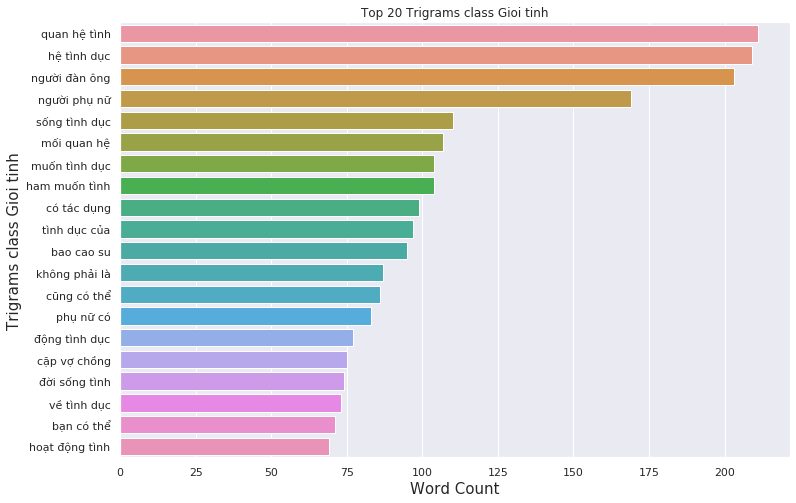

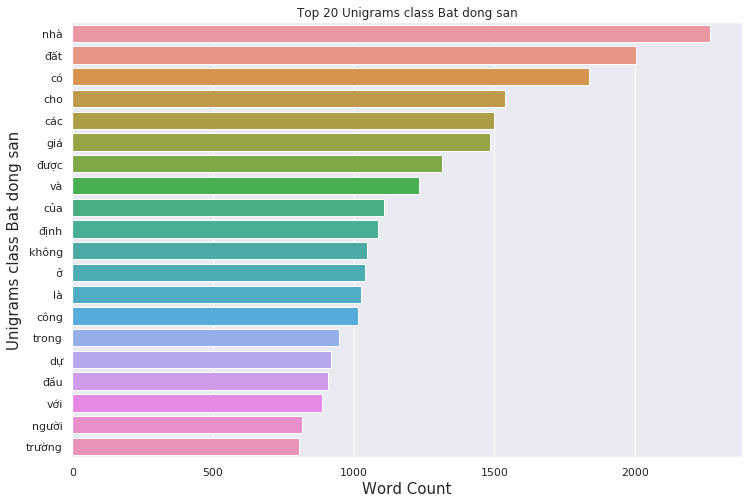

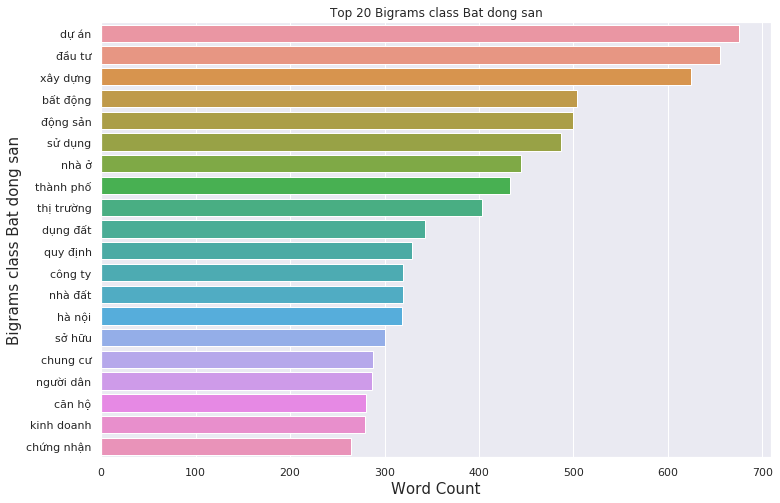

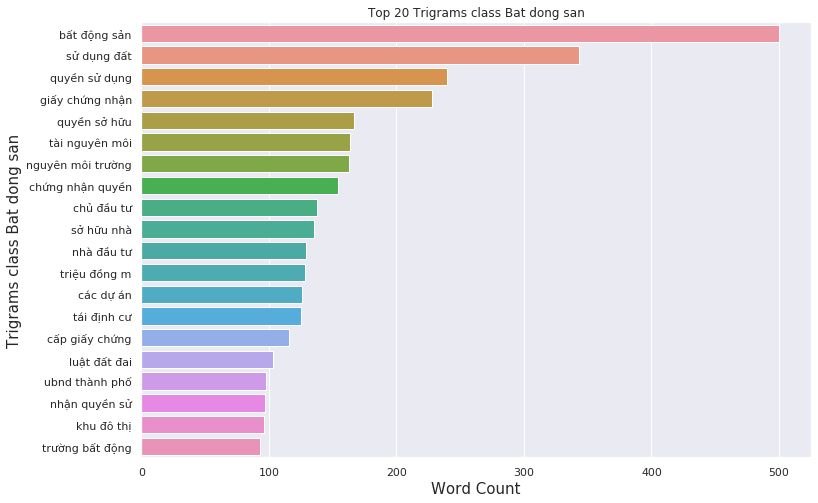

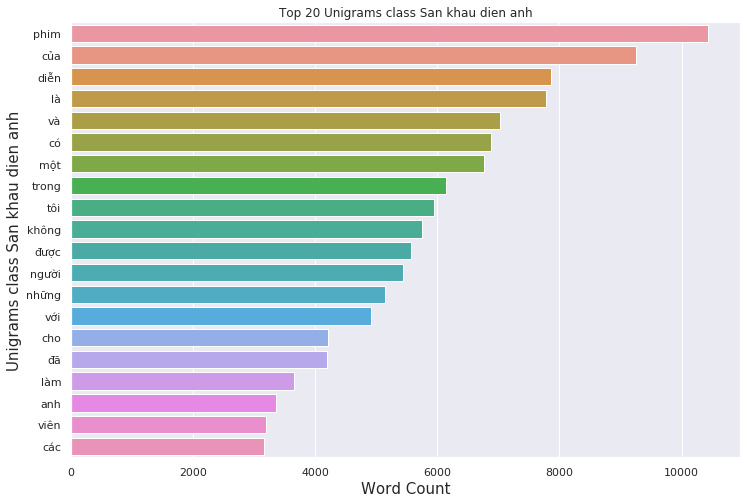

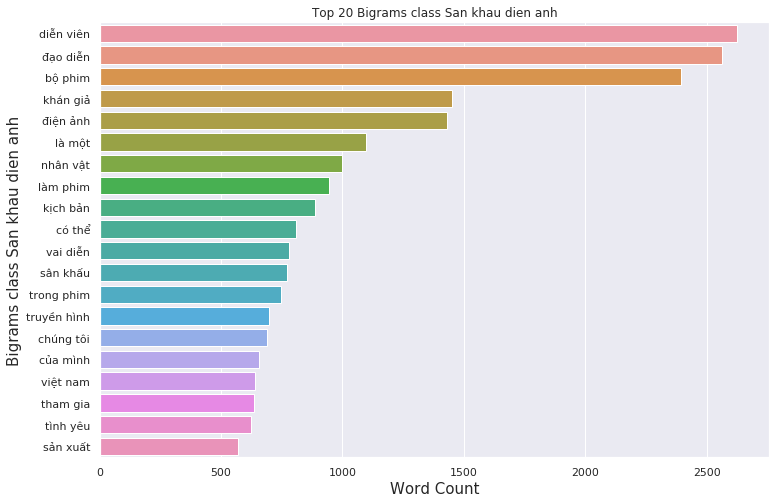

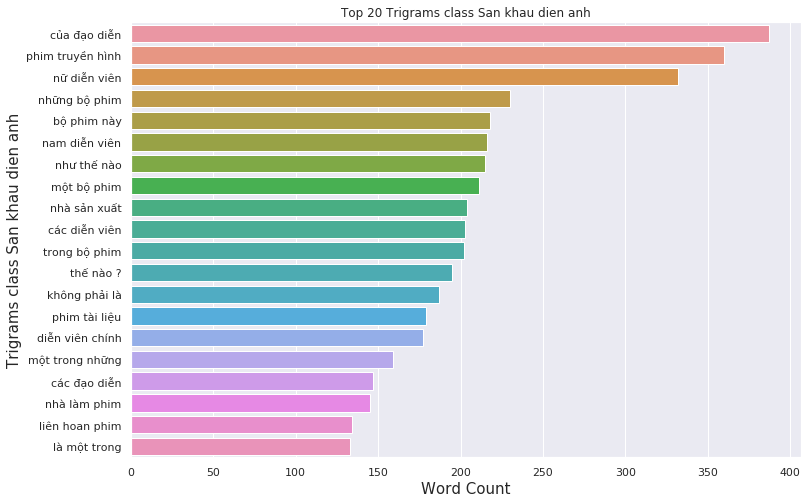

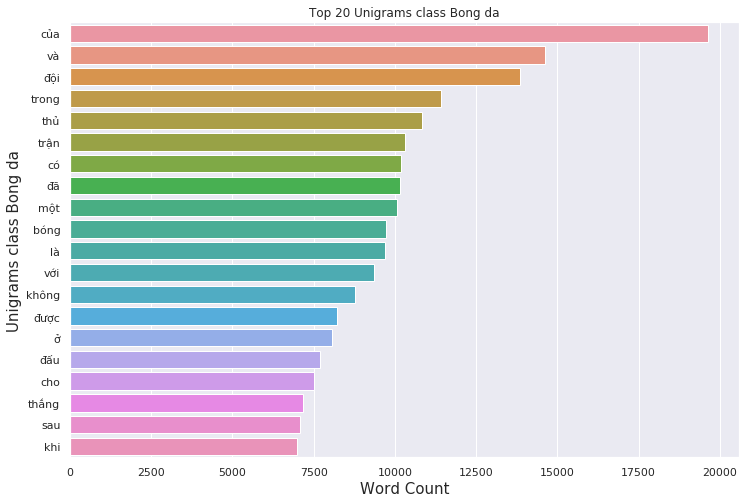

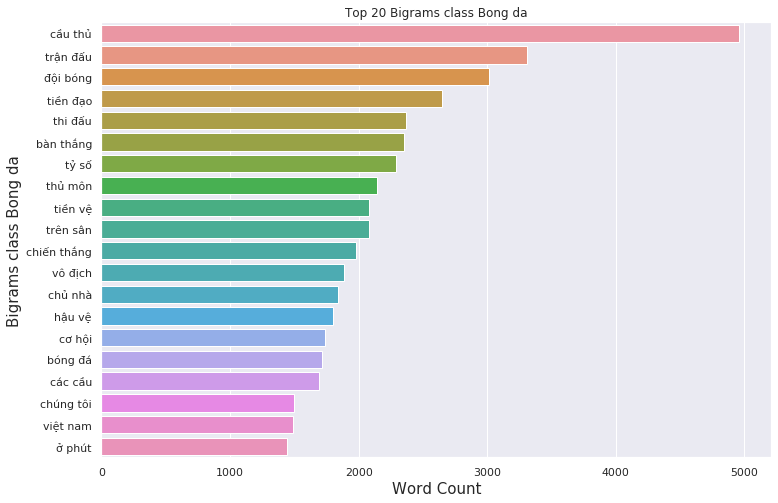

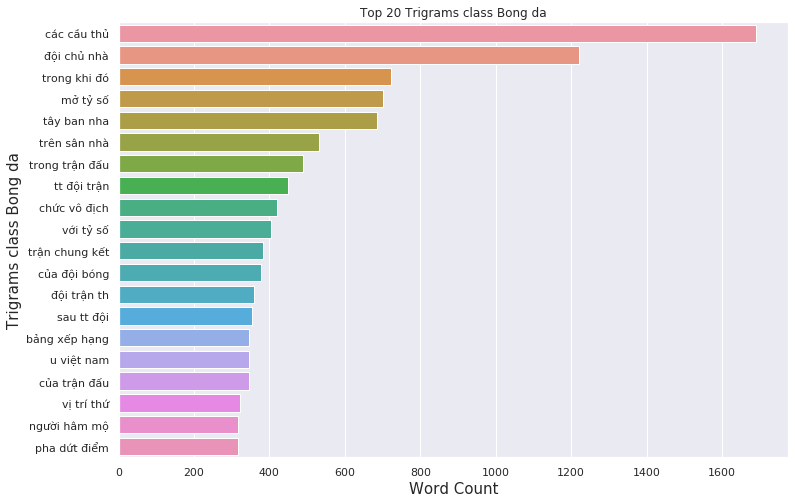

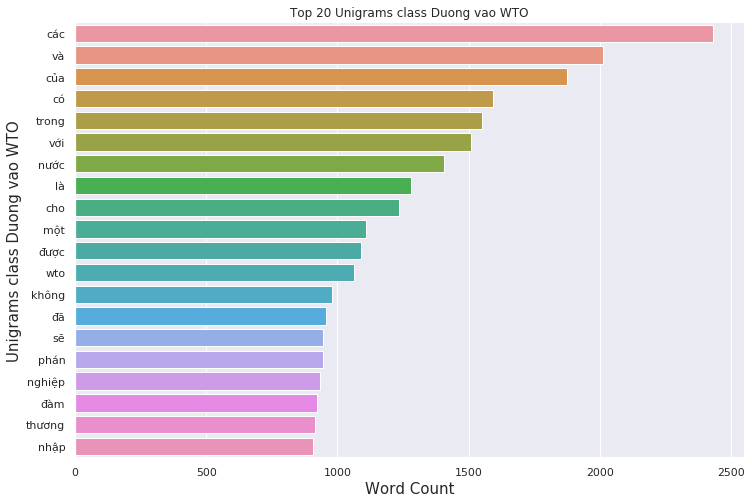

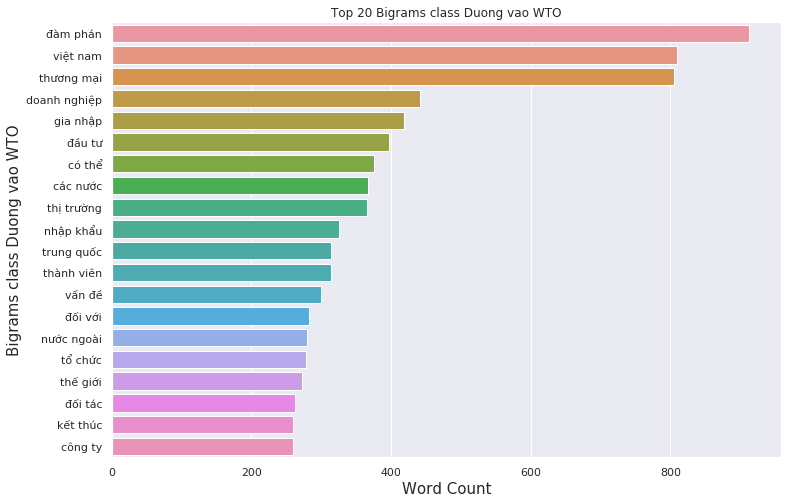

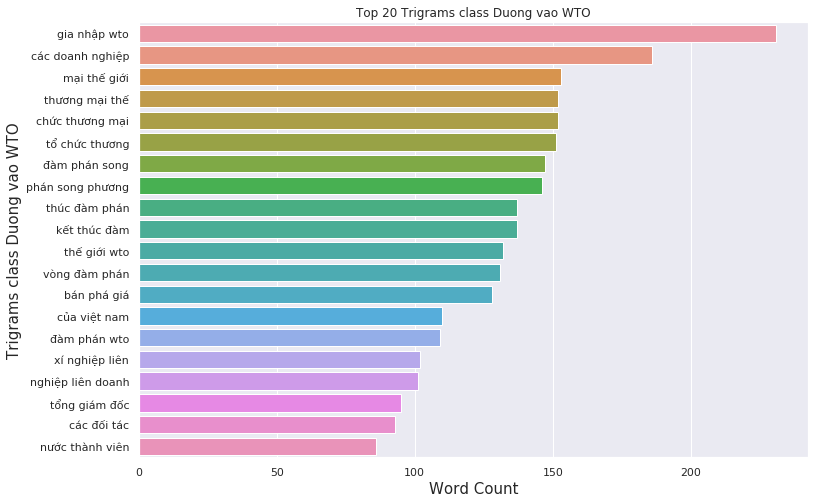

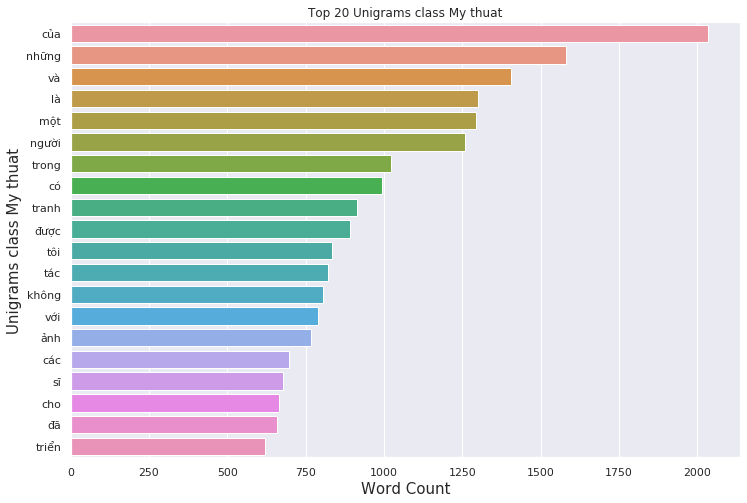

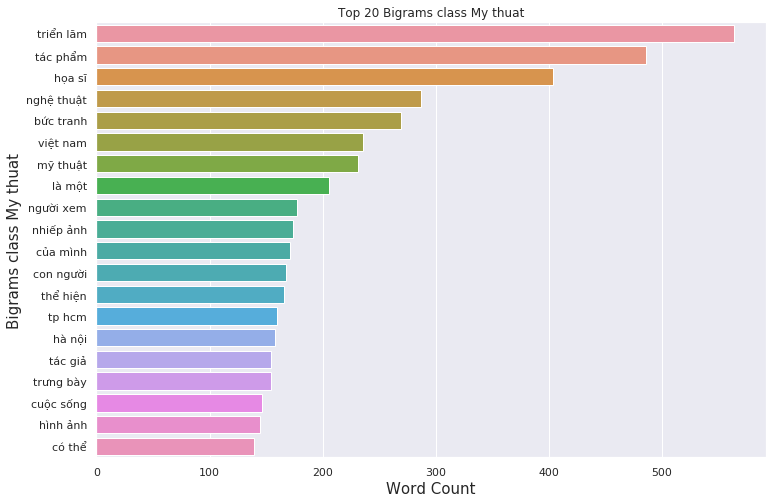

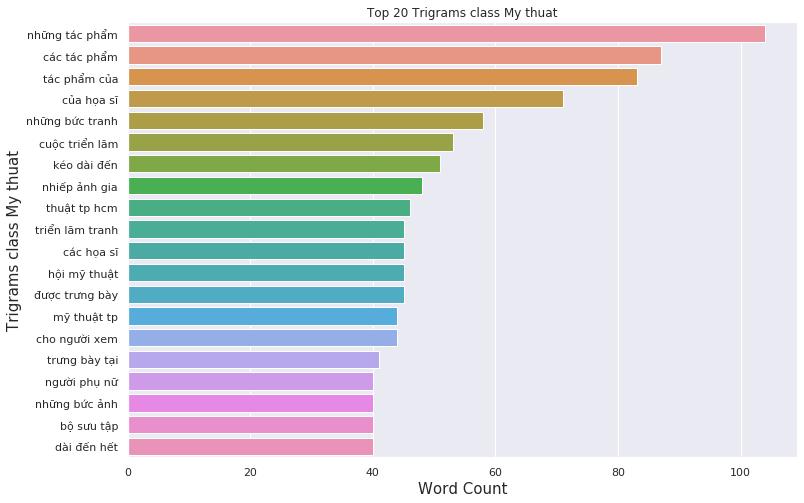

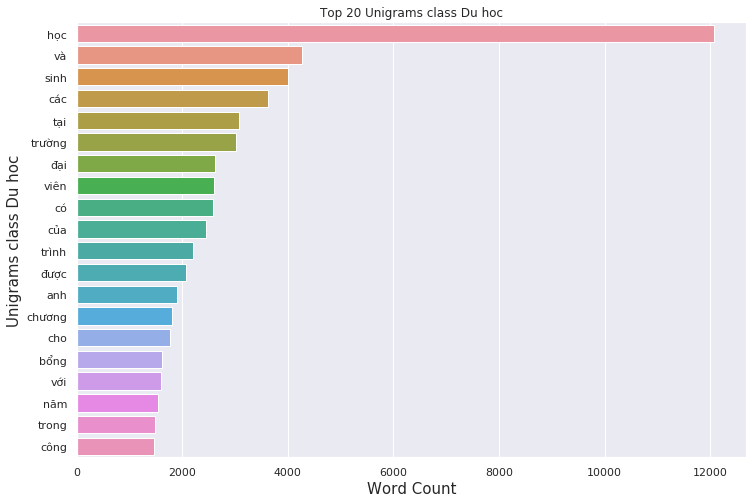

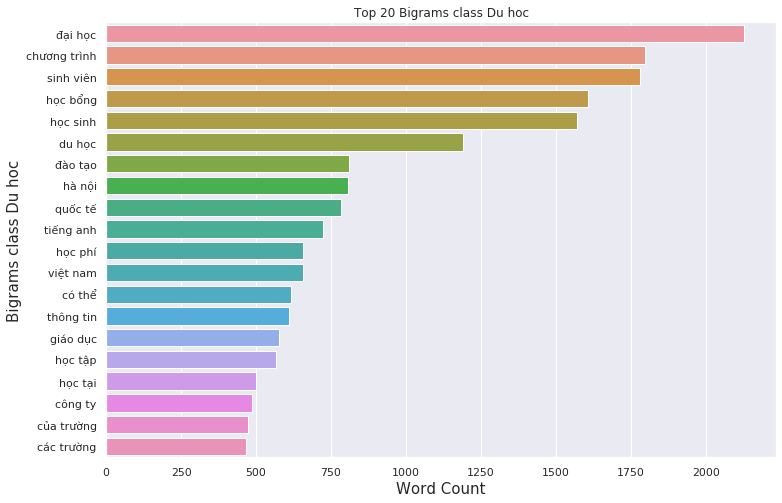

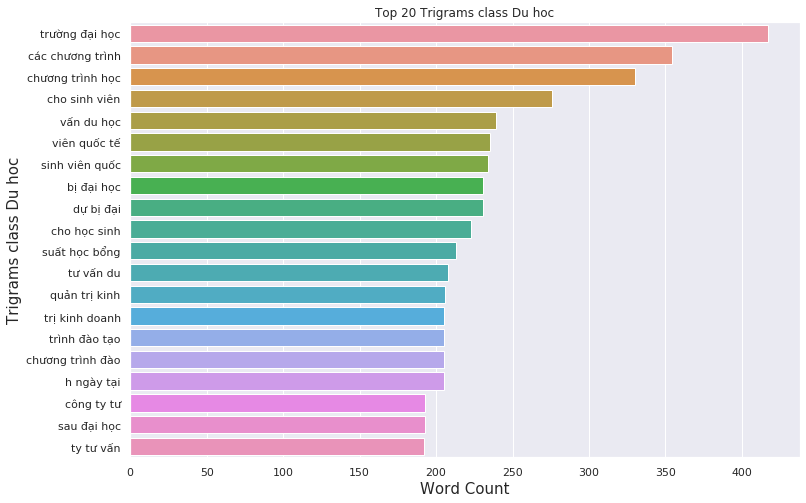

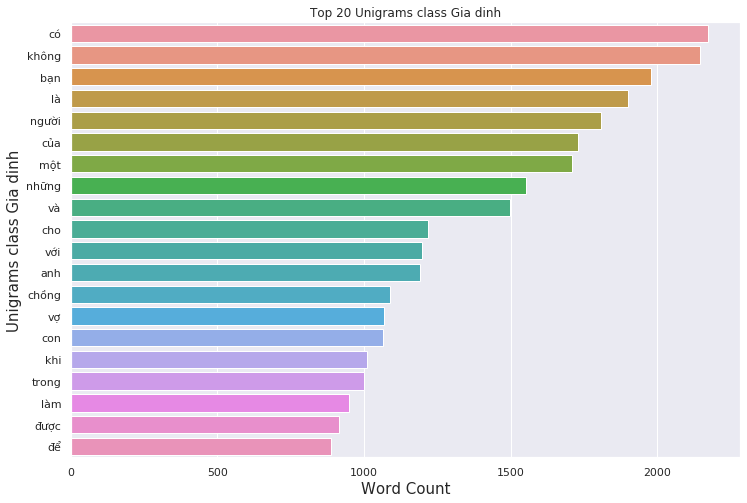

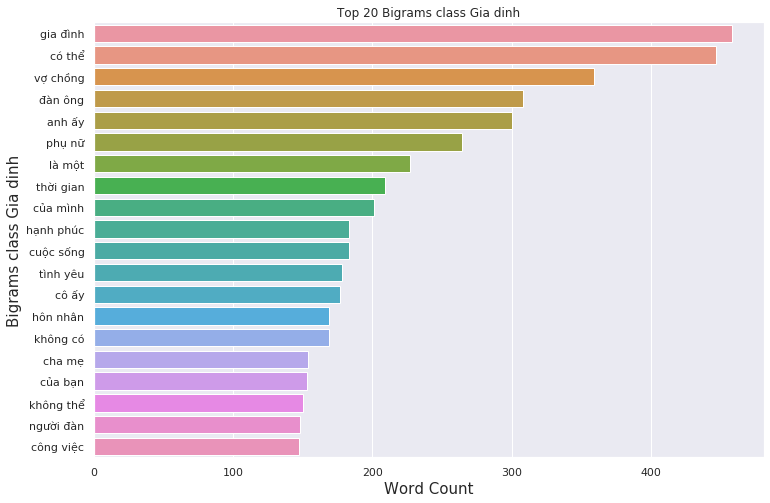

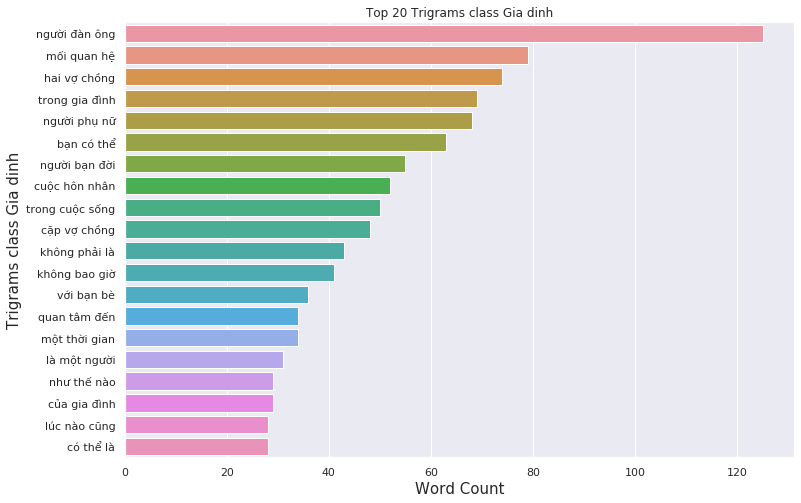

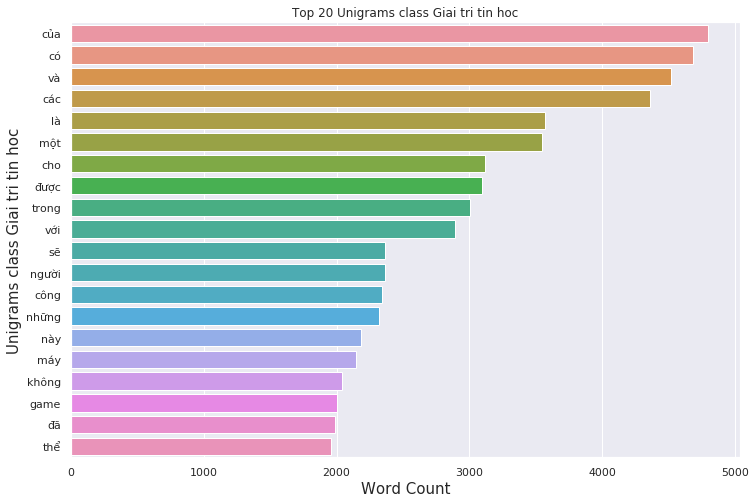

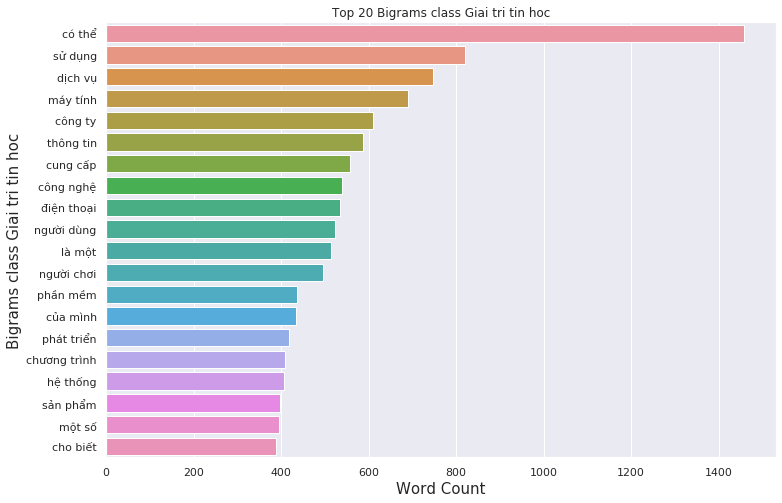

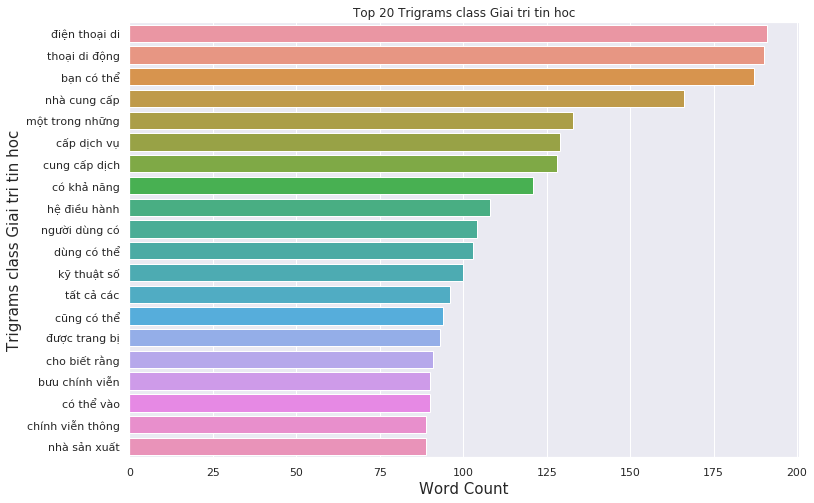

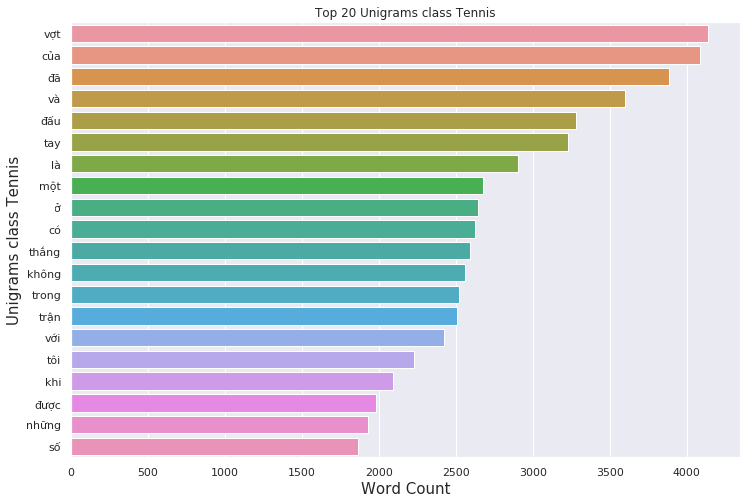

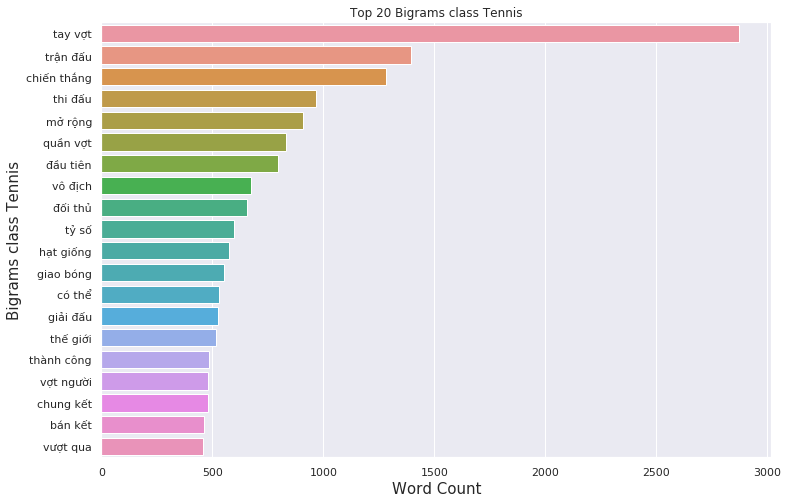

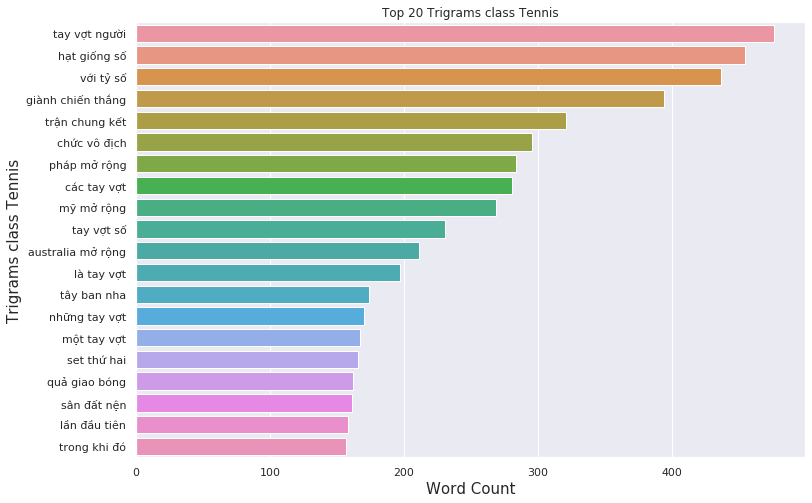

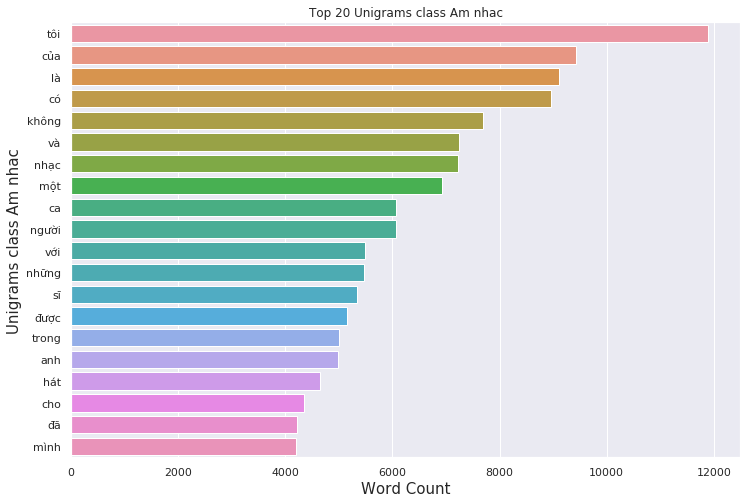

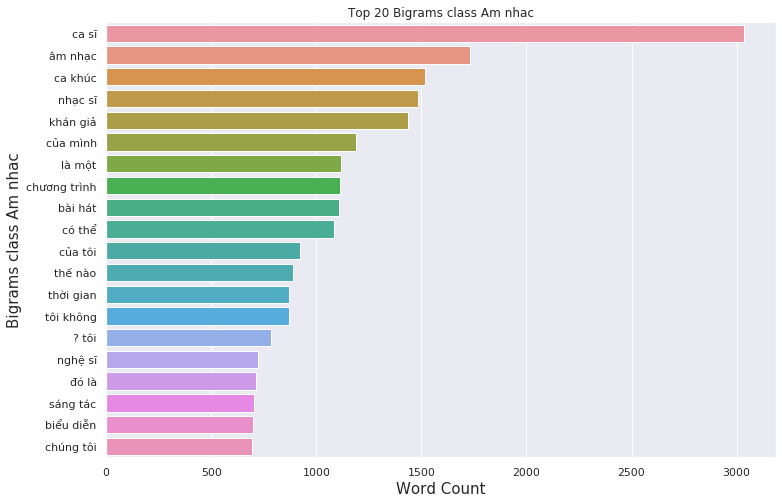

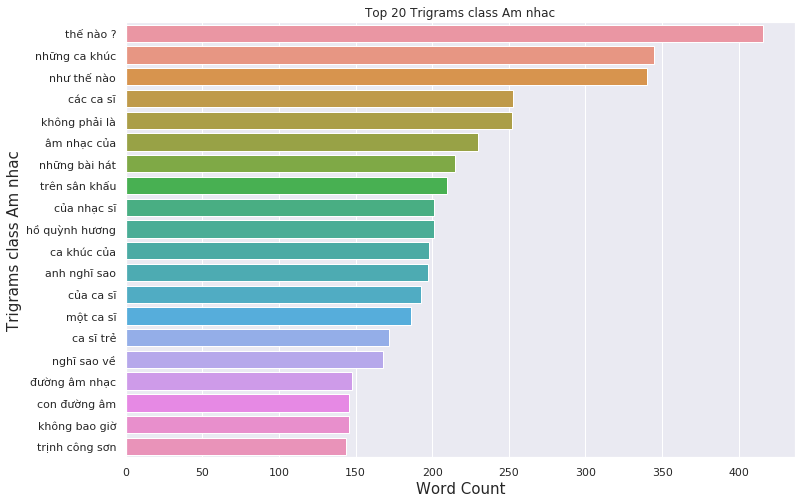

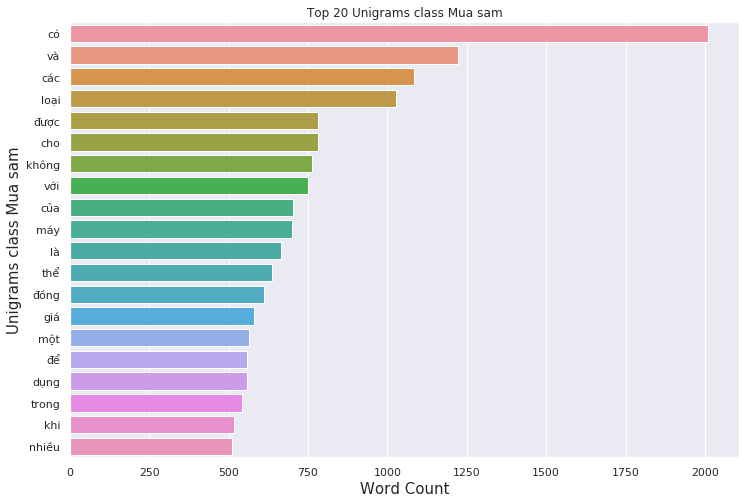

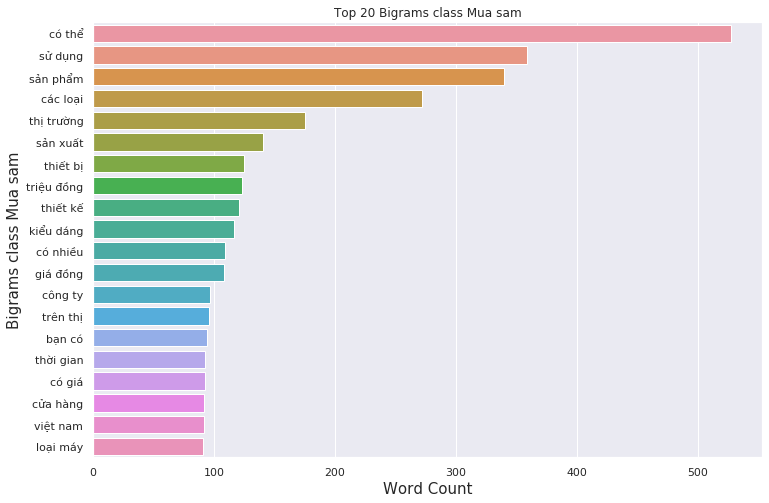

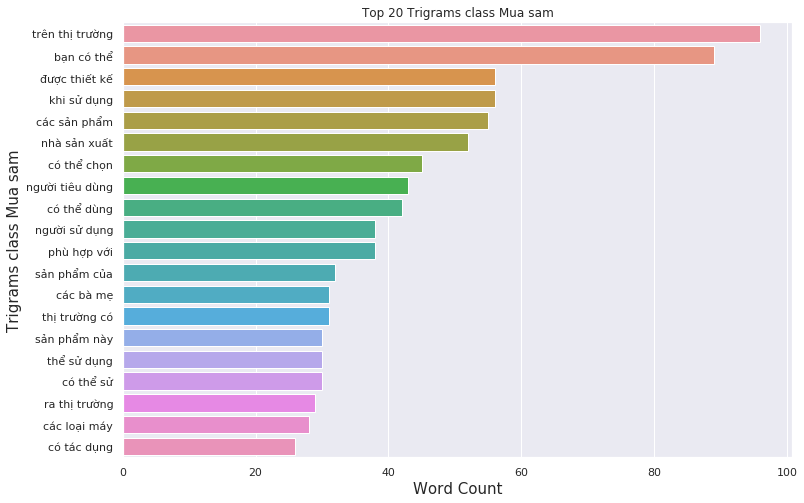

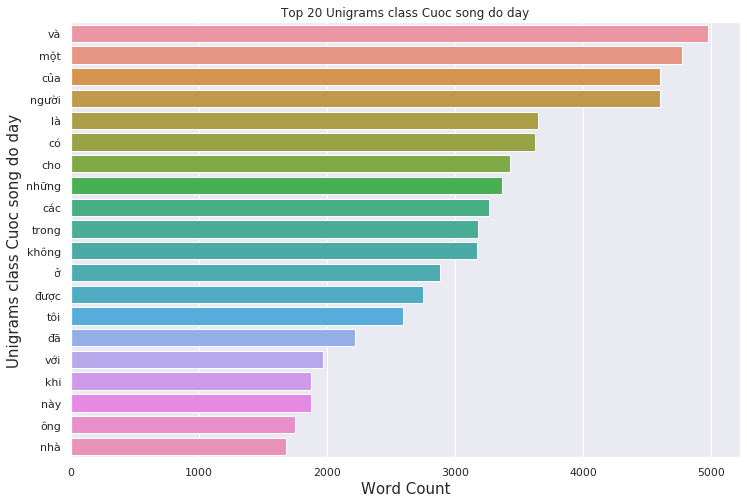

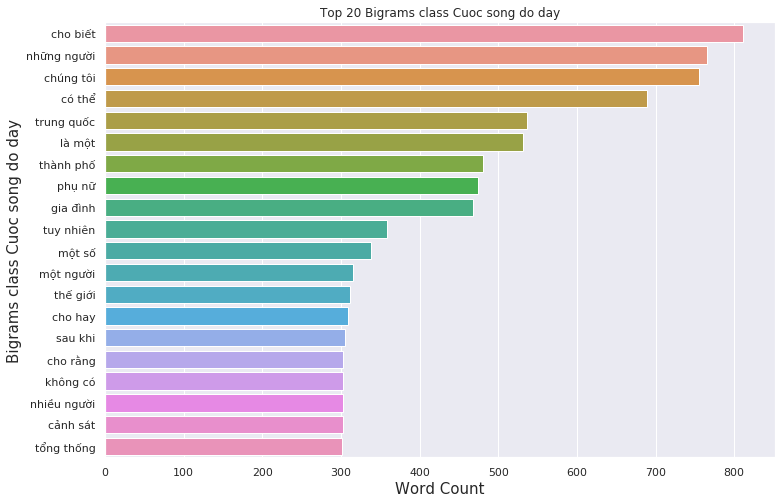

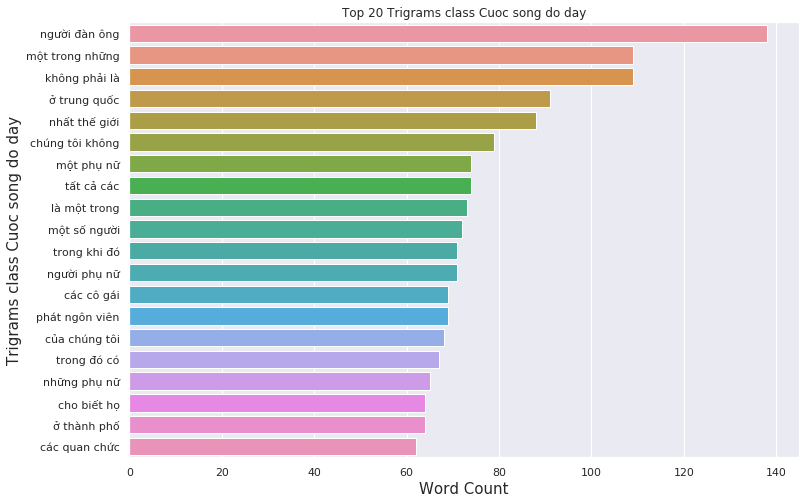

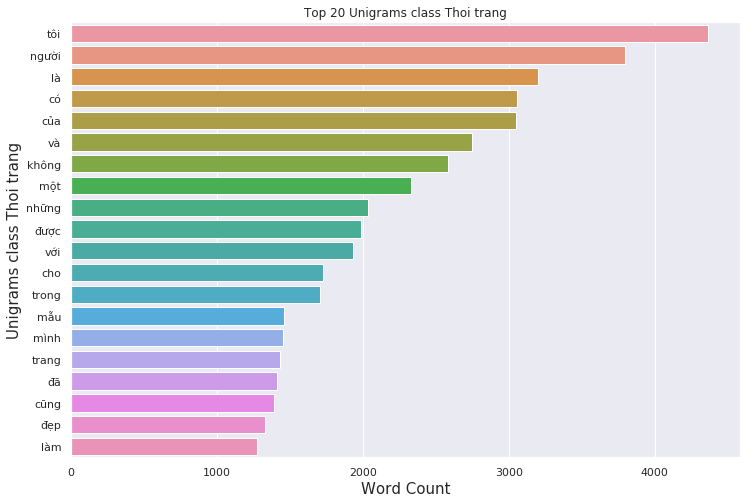

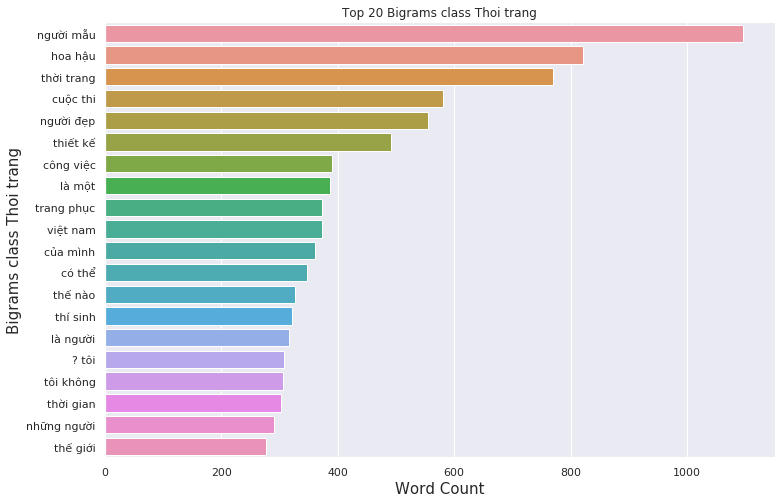

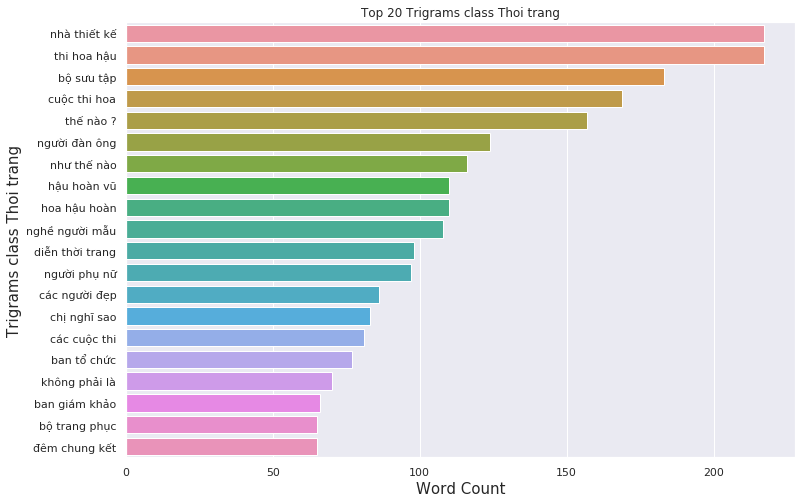

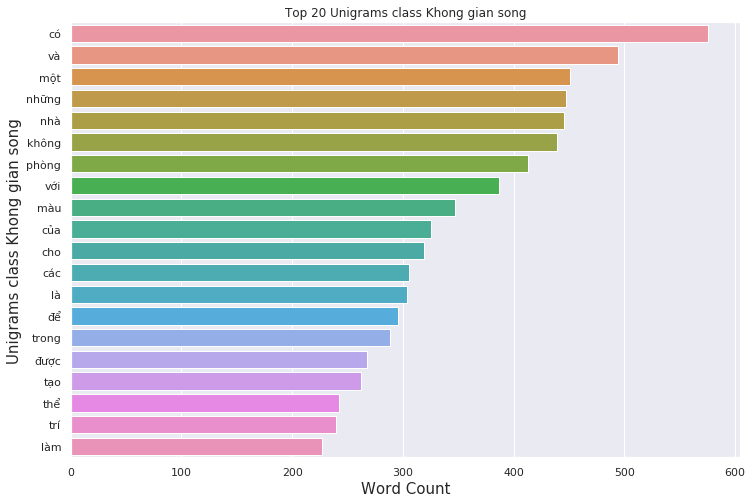

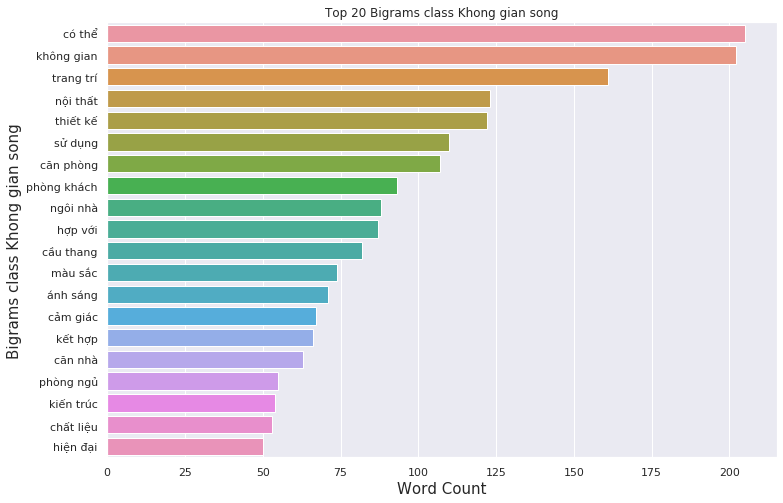

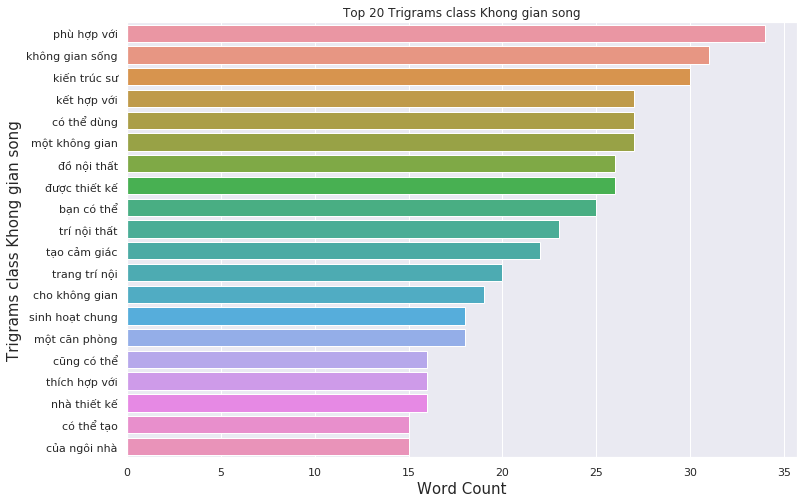

In [100]:
# Visualize n-grams for each label
grams_prefix = ['Uni', 'Bi', 'Tri']
class_l = df_train['label'].unique()
for cl in class_l:
    df_cl = df_train[df_train['label'] == cl]
    for i in range(3):
        gram = generate_ngrams(df_cl, i + 1, 20)
        plt.figure(figsize=(12,8))
        sns.barplot(gram["wordcount"], gram["word"])
        plt.xlabel("Word Count", fontsize=15)
        plt.ylabel(f"{grams_prefix[i]}grams class {cl}", fontsize=15)
        plt.title(f"Top 20 {grams_prefix[i]}grams class {cl}")
        plt.show()